# Test the HALO Downstreaming Pipelines

## Load the library

In [1]:
# import scvi
from typing import Dict, Iterable, Optional
# import scvi
import numpy as np
import torch
import pandas as pd
from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
from torch import tensor
from complementary_models import HALOMASKVIR_ALN as HALOVI
from complementary_models import HALOMASKVAE_ALN as HALOVAE
# from complementary_models import HALOMASKVIR as HALOVI
# from complementary_models import HALOMASKVAE as HALOVAE

import scanpy as sc
import scvi
from matplotlib import pyplot as plt

Global seed set to 0


In [14]:
path2figdir = "figs/Hair/20_aligned"
sc.settings.figdir =path2figdir
sc.set_figure_params(vector_friendly=True)

In [15]:
path = "/mnt/data0/halo/skin/multivelo_hair.h5ad"
adata_multi = sc.read_h5ad(path)
adata_multi.obs["batch_id"] = 1
adata_multi.var["modality"] =adata_multi.var["feature_types"]
adata_mvi = scvi.data.organize_multiome_anndatas(adata_multi)
sc.pp.filter_genes(adata_mvi, min_cells=int(adata_mvi.shape[0] * 0.01))

In [16]:
HALOVI.setup_anndata(adata_mvi,time_key='latent_time')
model = HALOVI(
    adata_mvi,
    n_genes=(adata_mvi.var['modality']=='Gene Expression').sum(),
    n_regions=(adata_mvi.var['modality']=='Peaks').sum(),
    n_latent=20,
    n_dependent=10
)     

n_cats_per_cov None


## Load pretrained model

In [17]:
model = model.load("model_hair_align_causal01_20", adata_mvi)


INFO     File model_hair_align_causal01_20/model.pt already downloaded                       
n_cats_per_cov None


In [11]:
latent_expr, latent_acc,latent_expr_dep, latent_atac_dep, latent_expr_indep, latent_atac_indep, times  = model.get_latent_representation()

In [23]:
adata_mvi.obs['latent_time'] = adata_mvi.obs['latent_time'].astype(float)

In [11]:
adata_mvi.obs.loc[(adata_mvi.obs.celltype=="TAC-2")&(adata_mvi.obs.latent_time>0.45), "celltype"] = "IRS"

adata_mvi.obs.celltype.unique()

['TAC-1', 'IRS', 'Medulla', 'TAC-2', 'Hair Shaft-cuticle.cortex']
Categories (5, object): ['Hair Shaft-cuticle.cortex', 'IRS', 'Medulla', 'TAC-1', 'TAC-2']

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


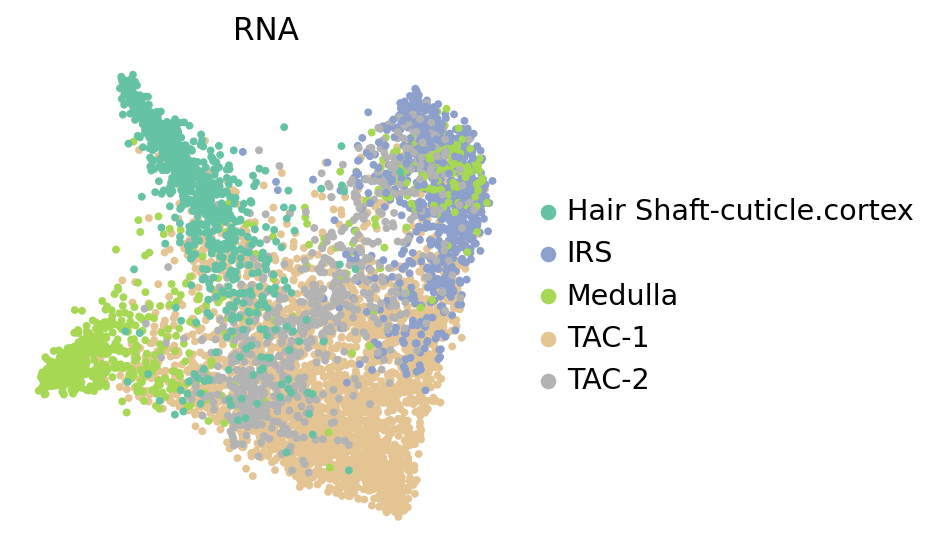

<Figure size 320x320 with 0 Axes>

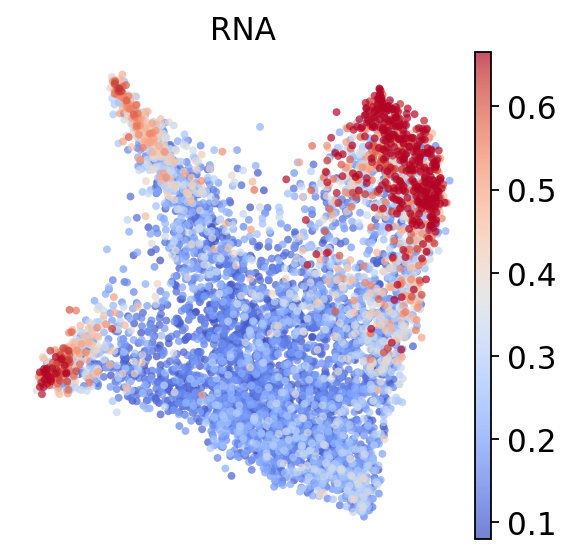

<Figure size 320x320 with 0 Axes>

In [91]:
adata_mvi.obsm["latent"] = latent_expr

sc.pp.neighbors(adata_mvi, use_rep = 'latent',n_neighbors=15, metric = 'manhattan')
# sc.tl.umap(adata_mvi, min_dist=0.1)

sc.tl.umap(adata_mvi, min_dist=0.01, negative_sample_rate=0.05, spread=10)

# sc.pl.umap(rna_data, frameon=False, size = 10, alpha = 1, add_outline=True,
#           outline_width=(0.1,0), color='leiden')
from matplotlib import pyplot as plt

path2figdir = "figs/Hair/20_aligned/"
sc.settings.figdir =path2figdir
figure_name = "_RNA"
format = ".png"
save_path = figure_name+format
# with plt.rc_context():
sc.set_figure_params(vector_friendly=True)
sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 1, add_outline=False,
        outline_width=(0.01,0), color=['celltype'], title="RNA",save=save_path, palette="Set2")
plt.savefig(save_path, bbox_inches="tight", dpi=300)      



figure_name = "_RNA_latenttime"
format = ".png"
save_path = figure_name+format

sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=['latent_time'], title="RNA", color_map = 'coolwarm', save=save_path, vmin="p05", vmax="p95") 

plt.savefig(save_path, bbox_inches="tight", dpi=300)      

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


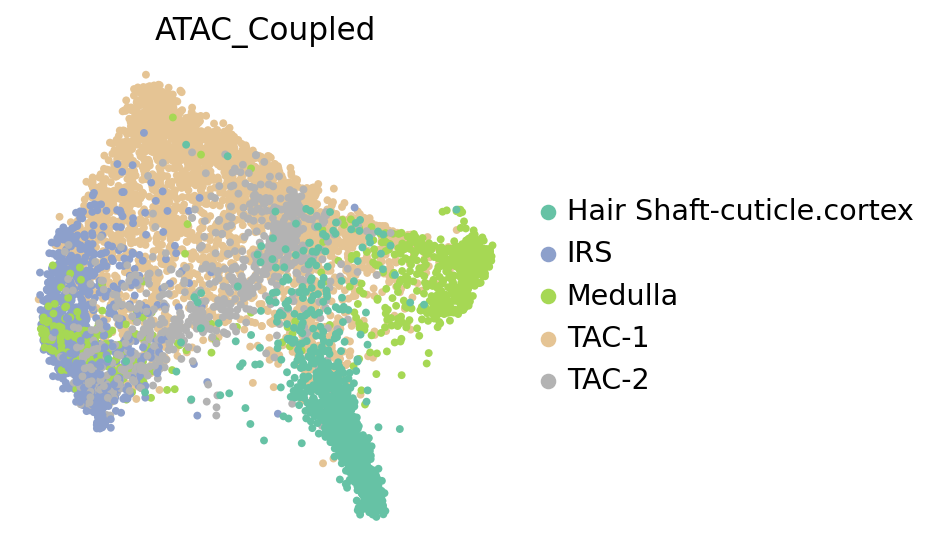

<Figure size 320x320 with 0 Axes>

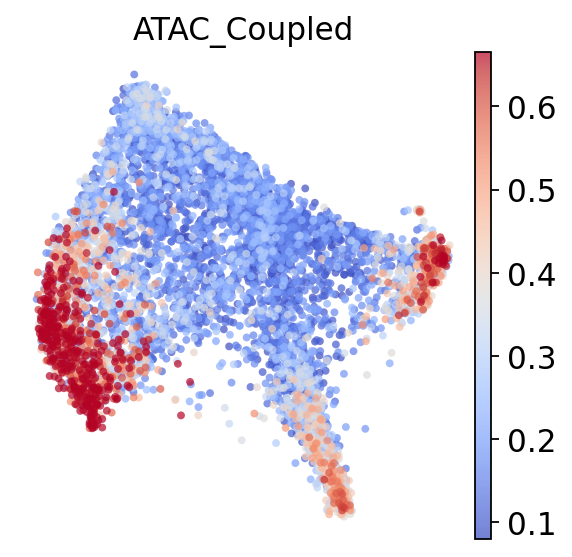

<Figure size 320x320 with 0 Axes>

In [12]:
adata_mvi.obsm["latent"] = np.concatenate([latent_expr, latent_acc], axis=1)

sc.pp.neighbors(adata_mvi, use_rep = 'latent',n_neighbors=10, metric = 'manhattan')
# sc.tl.umap(adata_mvi, min_dist=0.1)

sc.tl.umap(adata_mvi, min_dist=0.1, negative_sample_rate=0.1, spread=10)

# sc.pl.umap(rna_data, frameon=False, size = 10, alpha = 1, add_outline=True,
#           outline_width=(0.1,0), color='leiden')
from matplotlib import pyplot as plt

path2figdir = "figs/Hair/20_aligned/"
sc.settings.figdir =path2figdir
figure_name = "_RNA_ATAC"
format = ".png"
save_path = figure_name+format
# with plt.rc_context():
sc.set_figure_params(vector_friendly=True)
sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 1, add_outline=False,
        outline_width=(0.01,0), color=['celltype'], title="ATAC_Coupled",save=save_path, palette="Set2")
plt.savefig(save_path, bbox_inches="tight", dpi=300)      



figure_name = "_RNA_ATAC_latenttime"
format = ".png"
save_path = figure_name+format

sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=['latent_time'], title="ATAC_Coupled", color_map = 'coolwarm', save=save_path, vmin="p05", vmax="p95") 

plt.savefig(save_path, bbox_inches="tight", dpi=300)   

In [8]:
adata_mvi.obsm["latent"] = latent_atac_indep

sc.pp.neighbors(adata_mvi, use_rep = 'latent',n_neighbors=10, metric = 'manhattan')
# sc.tl.umap(adata_mvi, min_dist=0.1)

sc.tl.umap(adata_mvi, min_dist=0.1, negative_sample_rate=0.1, spread=10)


/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


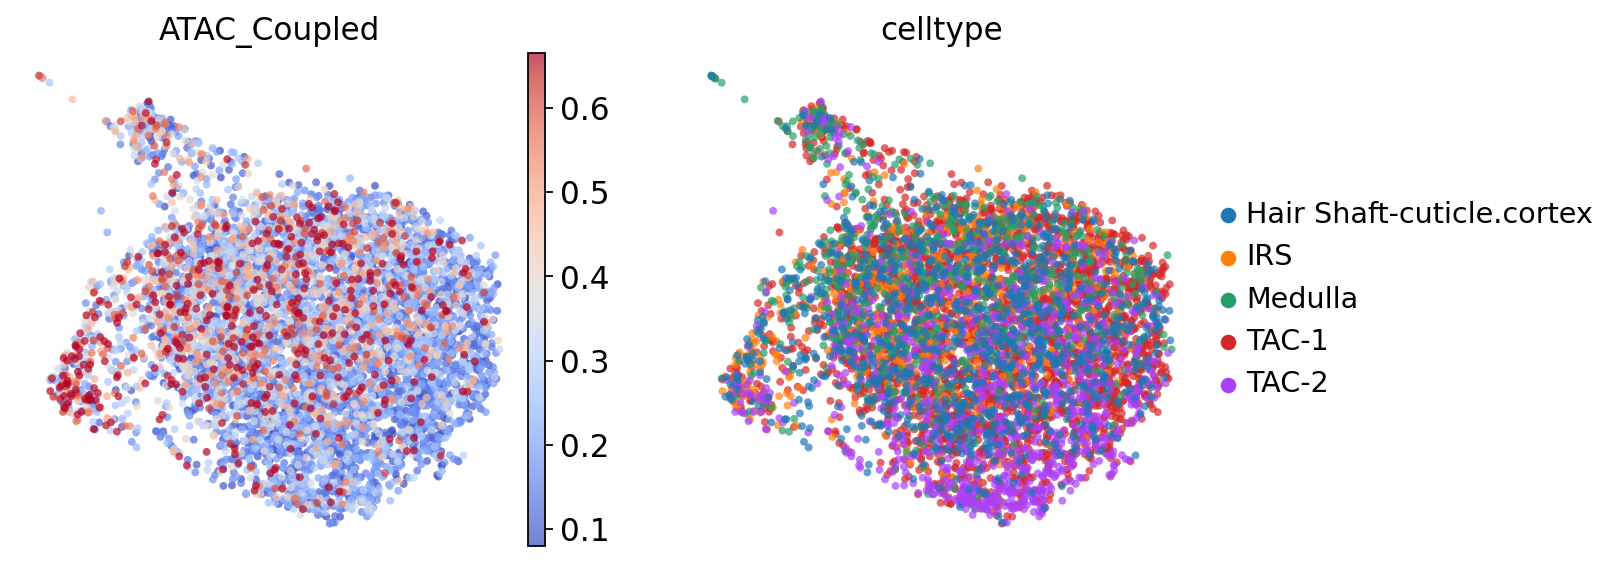

In [11]:
sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=['latent_time', "celltype"], title="ATAC_Coupled", color_map = 'coolwarm', vmin="p05", vmax="p95") 

In [74]:
## plot chromatin potential of each cell
def compute_chrom_potential_eu(decouple_acc,  couple_acc):
    if decouple_acc.shape != couple_acc.shape:
        raise ValueError("Matrices must have the same shape.")
    
    # Compute the difference couple_acc
    diff_matrix = decouple_acc - couple_acc
    
    # Square the differences
    squared_diff_matrix = np.square(diff_matrix)
    
    # Sum the squares column-wise
    sum_squared_diff = np.sum(squared_diff_matrix, axis=1)
    
    # Square root of the sum gives the Euclidean distance
    distances = np.sqrt(sum_squared_diff)


    min_distance = np.min(distances)
    max_distance = np.max(distances)
    normalized_distances = (distances - min_distance) / (max_distance - min_distance)
    
    
    return normalized_distances


def compute_chrom_potential_cos(matrix1, matrix2):
    if matrix1.shape != matrix2.shape:
        raise ValueError("Matrices must have the same shape.")
    
    dot_product = np.sum(matrix1 * matrix2, axis=1)
    magnitude1 = np.sqrt(np.sum(matrix1**2, axis=1))
    magnitude2 = np.sqrt(np.sum(matrix2**2, axis=1))
    cosine_similarity = dot_product / (magnitude1 * magnitude2)
    cosine_distance = 1 - cosine_similarity
    
    # Normalize the distances
    # min_distance = np.min(cosine_distance)
    # max_distance = np.max(cosine_distance)
    # normalized_distances = (cosine_distance - min_distance) / (max_distance - min_distance)
    
    return cosine_distance
from numpy.linalg import inv 

def residue_potential(matrix1, matrix2):
    X = matrix1
    Y = matrix2

    b = inv(X.T.dot(X)).dot(X.T).dot(Y)

    Yhat = X.dot(b)
    Y_Residual = Yhat - Y
    Y_Residual_3 = np.sum(Y_Residual,axis=1)

    # z = np.polyfit(time, Y_Residual_3, 4)
    # p = np.poly1d(z)

    return Y_Residual

In [19]:
adata_mvi.obsm["latent"] = np.concatenate([latent_expr, latent_acc], axis=1)
sc.pp.neighbors(adata_mvi, use_rep = 'latent',n_neighbors=10, metric = 'manhattan')
sc.tl.umap(adata_mvi, min_dist=0.1, negative_sample_rate=0.1, spread=10)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


(6436, 10)


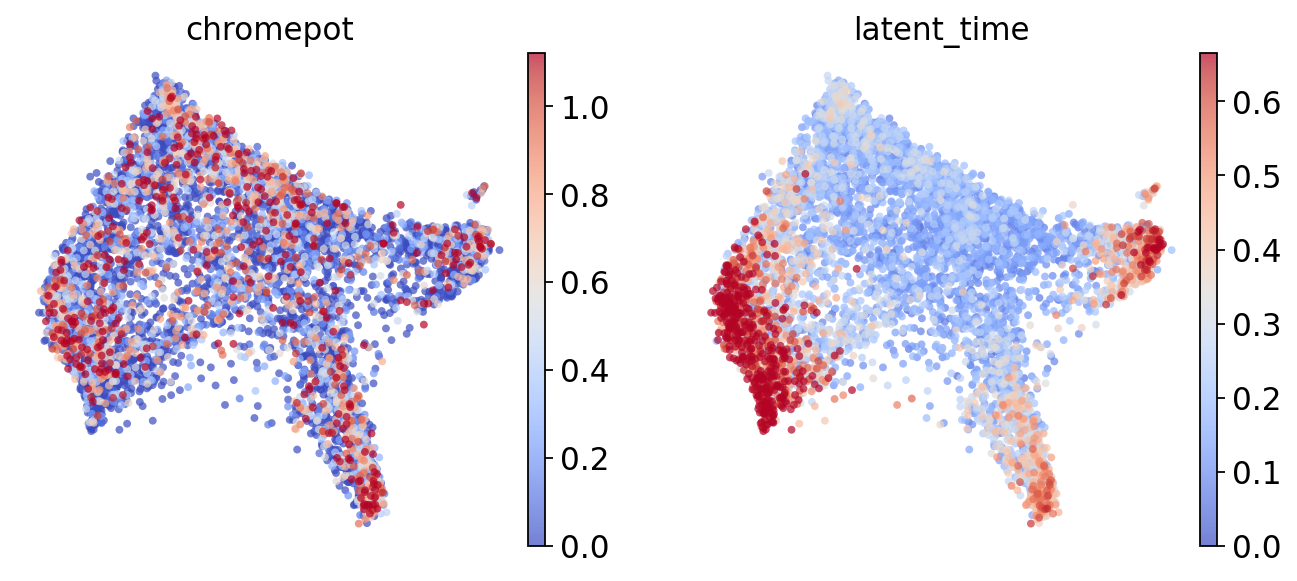

In [77]:
potential = residue_potential(latent_atac_dep,  latent_expr_dep)
print(potential.shape)
adata_mvi.obs["chromepot"] = potential

sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=[ "chromepot", "latent_time"],  color_map = 'coolwarm', vmin=0, vmax="p95") 

In [13]:
for i in range(20):
    adata_mvi.obs["epxr_latent_"+str(i)] = latent_expr[:,i]

for i in range(20):
    adata_mvi.obs["atac_latent_"+str(i)] =  latent_acc[:,i]

In [36]:
import seaborn as sns

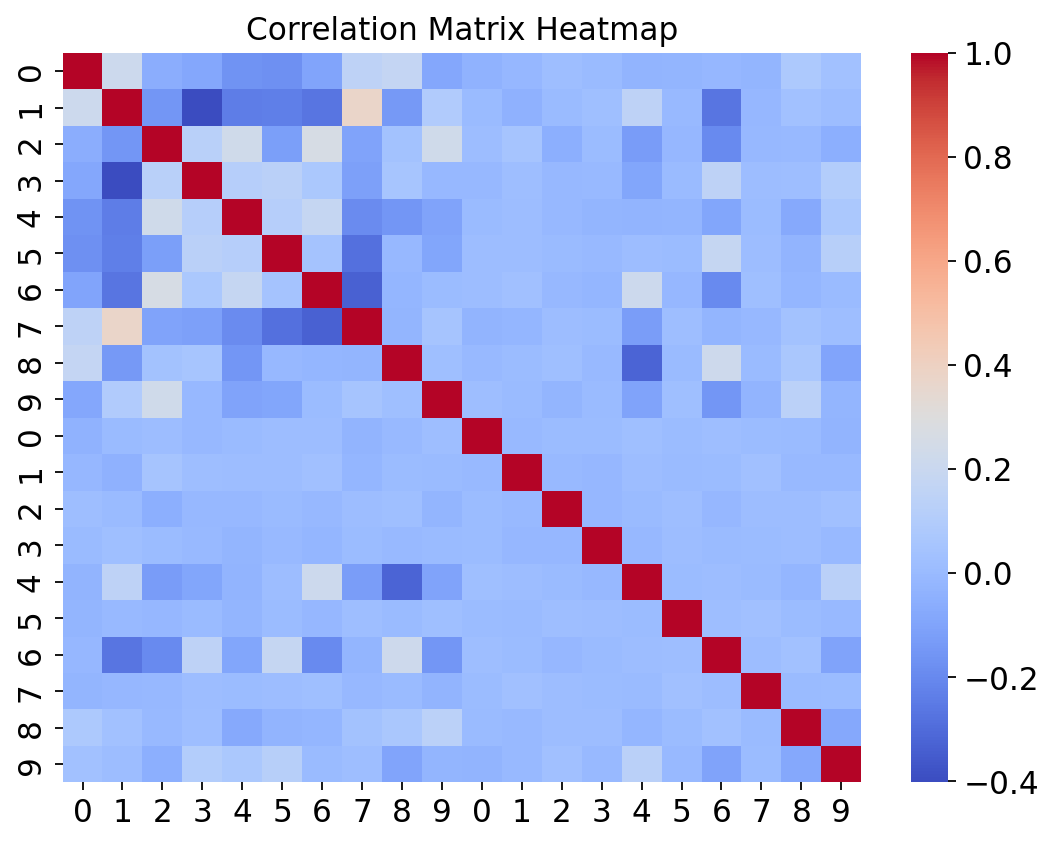

In [40]:
df_A = pd.DataFrame(latent_atac_dep)
df_B = pd.DataFrame(latent_atac_indep)
df_combined = pd.concat([df_A, df_B], axis=1)
correlation_matrix = df_combined.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [102]:
adata_mvi.obsm["latent"] = np.concatenate([latent_acc , latent_expr],axis=1)
sc.pp.neighbors(adata_mvi, use_rep = 'latent',n_neighbors=15, metric = 'manhattan')
sc.tl.umap(adata_mvi, min_dist=0.01, negative_sample_rate=0.05, spread=10)



/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [15]:
import seaborn as sns

In [21]:
for i in range(20):
        latent_name = "atac_latent_"+str(i) 

        path2figdir = "figs/Hair/20_aligned/"
        sc.settings.figdir =path2figdir
        figure_name = latent_name + "_both_"
        format = ".png"
        save_path = figure_name+format
        sc.set_figure_params(vector_friendly=True)
        sc.pl.umap(adata_mvi, frameon=False, size = 50, alpha = 0.5, add_outline=True, outline_color=("lightgray", "white"), 
        outline_width=(0.3,0), color=[latent_name], title=latent_name, color_map = 'Blues', save=save_path, vmin="p25", vmax="p95",show=False)
        # sc.pl.umap(adata_mvi, color=[latent_name], size = 50, alpha = 0.5, add_outline=True, frameon=False,
        #   outline_width=(0.3,0), outline_color=("lightgray", "white"),
        #   cmap=sns.blend_palette(["white", sns.xkcd_rgb["Blues"]],as_cmap=True), 
        #   # cmap=sns.color_palette("light:#5A9", as_cmap=True),
        #   title=latent_name, save=save_path, vmin="p25", vmax="p95",show=False) 
        plt.close()      



In [6]:
from complementary_models import split_rna,split_atac
rna_data = sc.read_h5ad("data/datasets/mouse_hair_rna_paired.h5ad")
atac_data = sc.read_h5ad("data/datasets/mouse_hair_mira_atac_norm.h5ad")

In [20]:
rna_data.obsm["latent"] = latent_atac_indep
sc.pp.neighbors(rna_data, use_rep = 'latent',n_neighbors=30, metric = 'manhattan')
sc.tl.leiden(rna_data)
sc.tl.umap(rna_data, min_dist=0.1, negative_sample_rate=0.1, spread=10)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [21]:
atac_data.obsm["latent"] = latent_atac_indep
sc.pp.neighbors(atac_data, use_rep = 'latent',n_neighbors=30, metric = 'manhattan')
sc.tl.leiden(atac_data)
sc.tl.umap(atac_data, min_dist=0.1, negative_sample_rate=0.1, spread=10)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


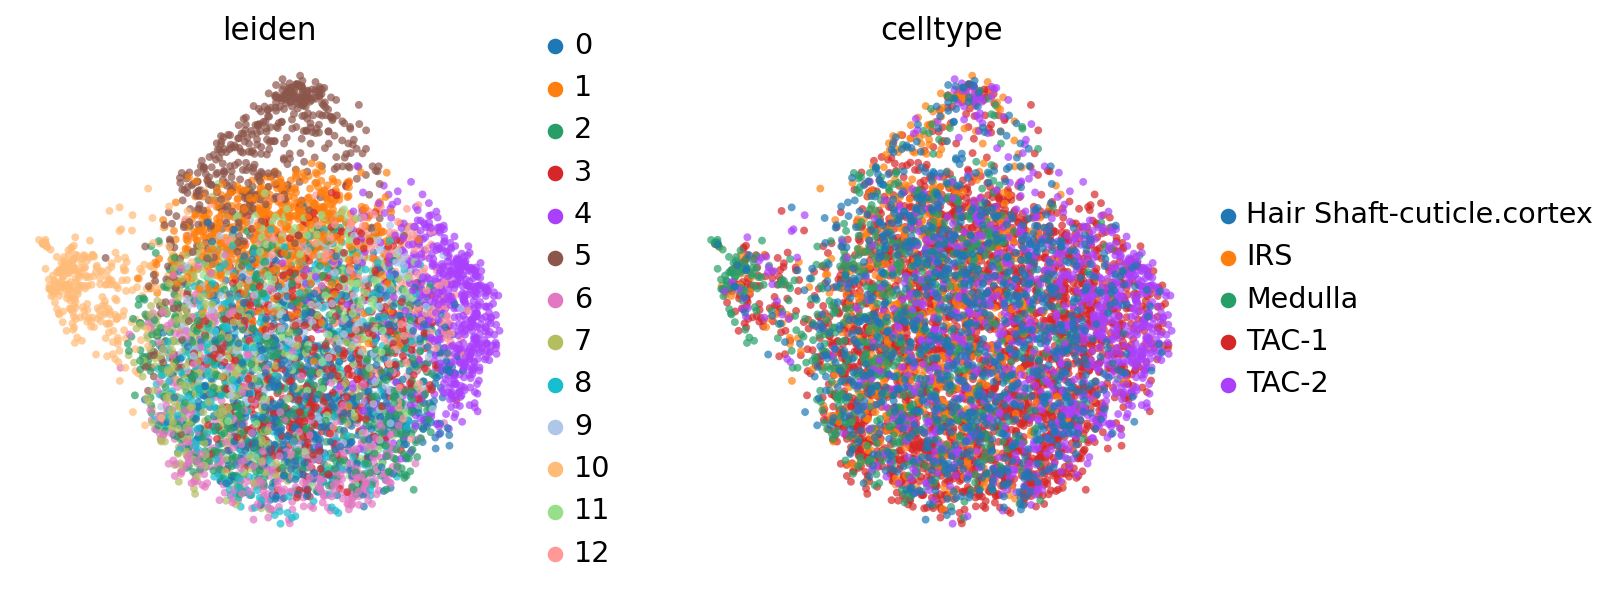

In [22]:
sc.pl.umap(atac_data, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=["leiden", "celltype"], color_map = 'coolwarm', vmin="p05", vmax="p95", use_raw=False) 

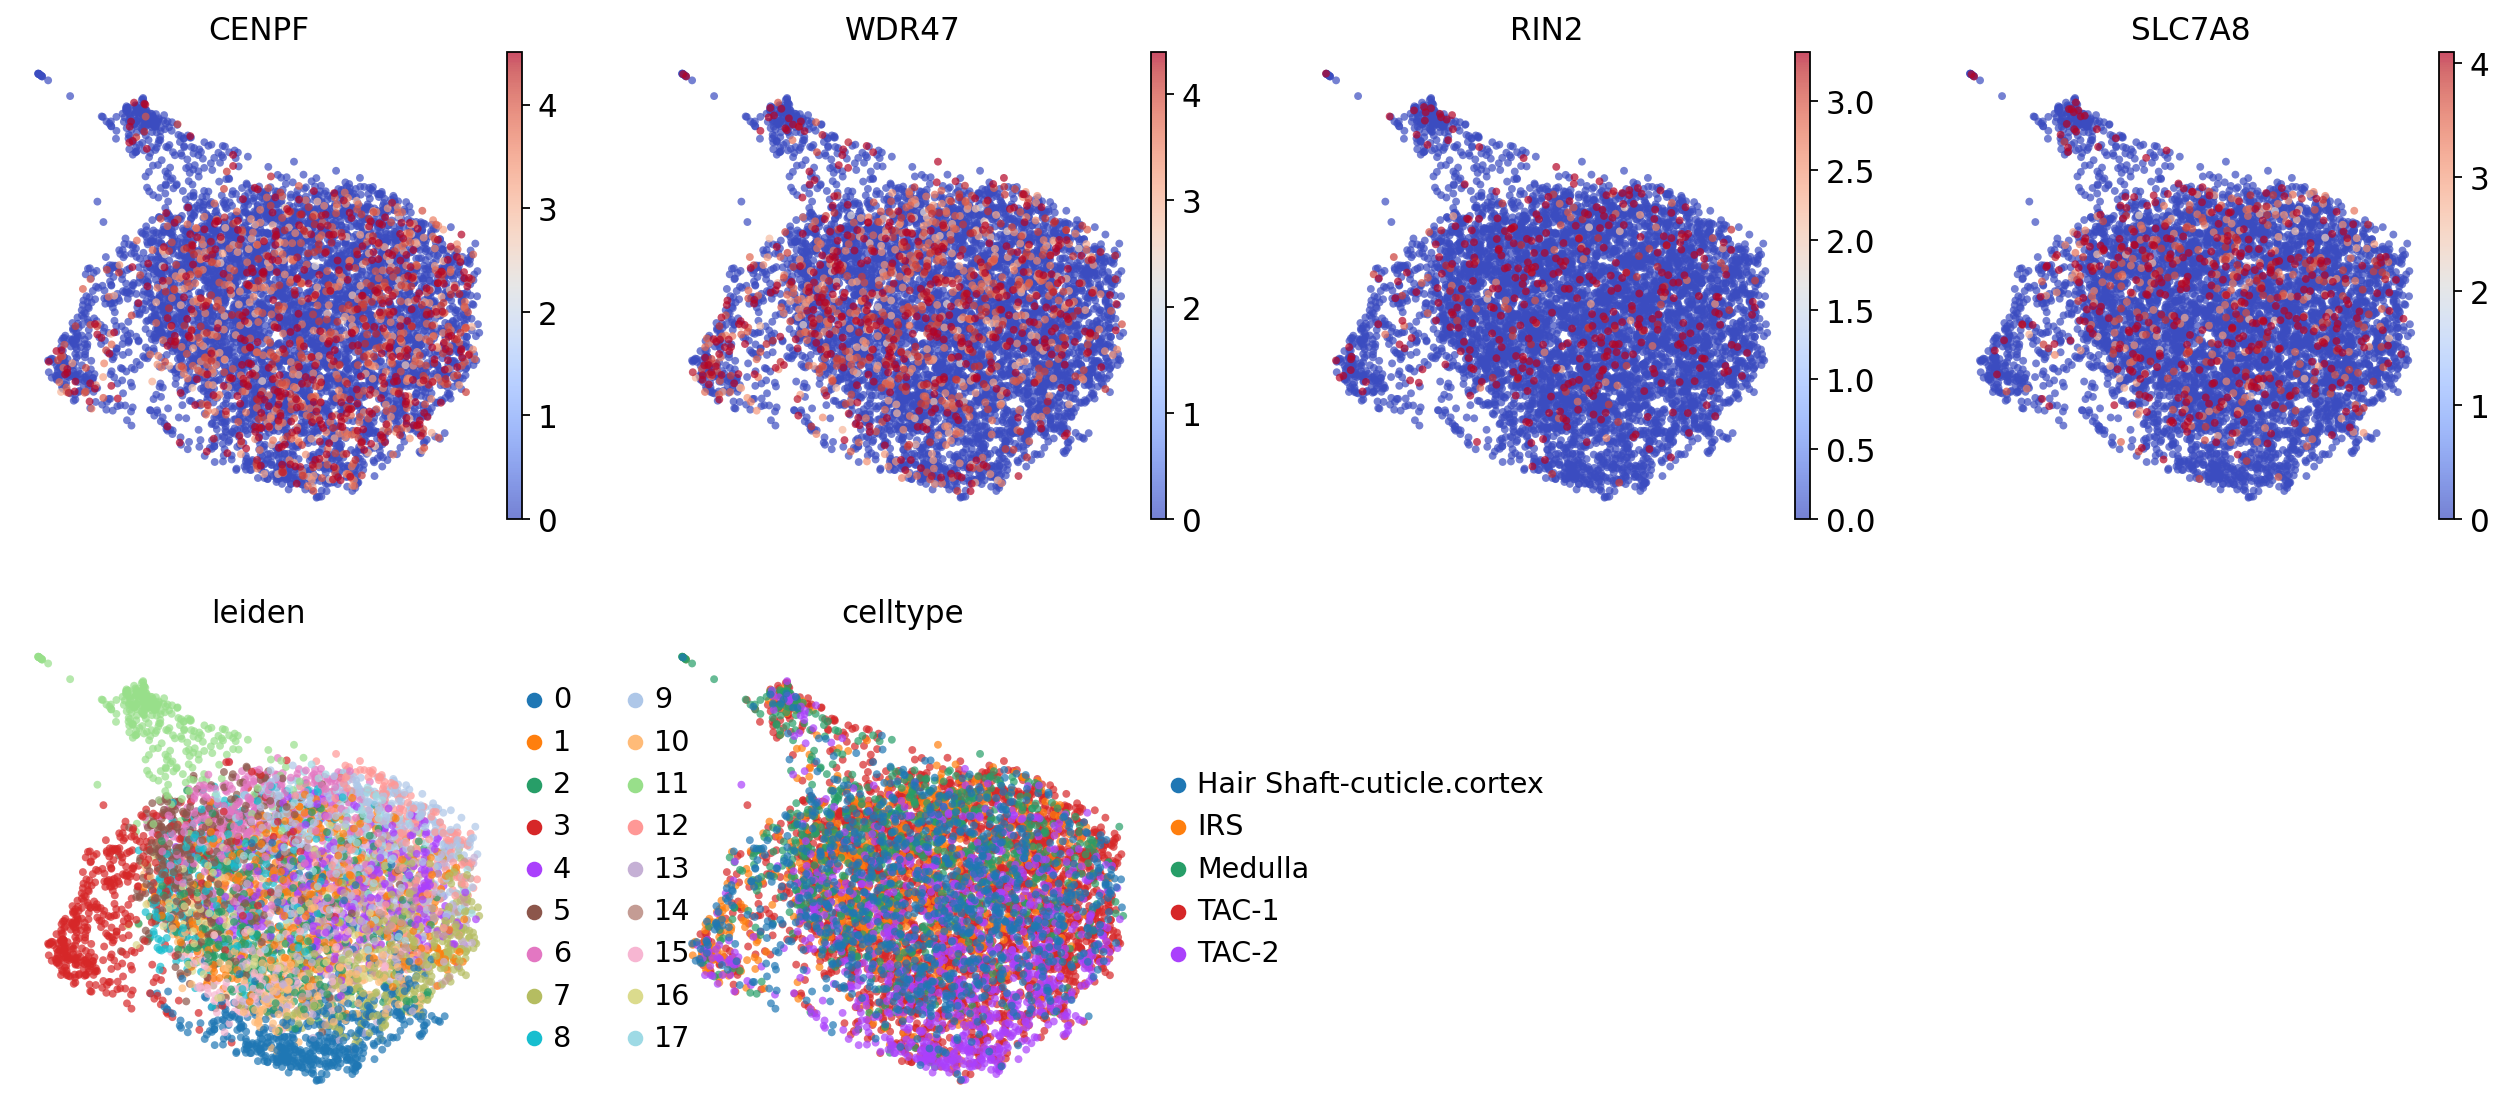

In [370]:

sc.pl.umap(rna_data, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=["CENPF", "WDR47",  "RIN2", "SLC7A8", "leiden", "celltype"], color_map = 'coolwarm', vmin="p05", vmax="p95", use_raw=False) 

In [23]:
atac_data.write_h5ad("data/datasets/mouse_hair_atac_leiden.h5ad")

In [372]:
rna_data.obsm["latent"] = latent_atac_dep

sc.pp.neighbors(rna_data, use_rep = 'latent',n_neighbors=10, metric = 'manhattan')
sc.tl.umap(rna_data, min_dist=0.1, negative_sample_rate=0.1, spread=10)



/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


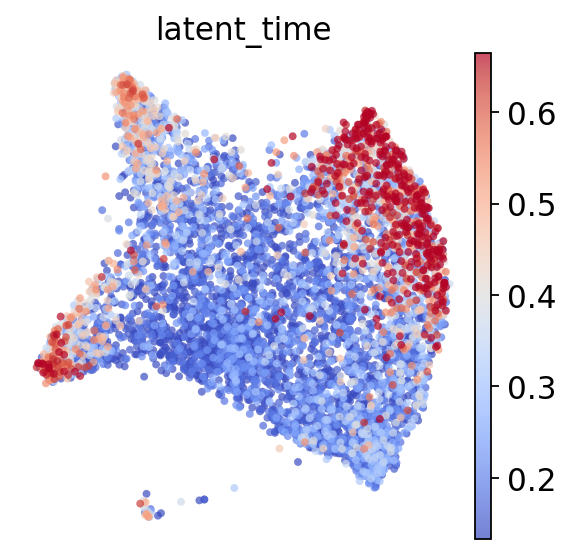

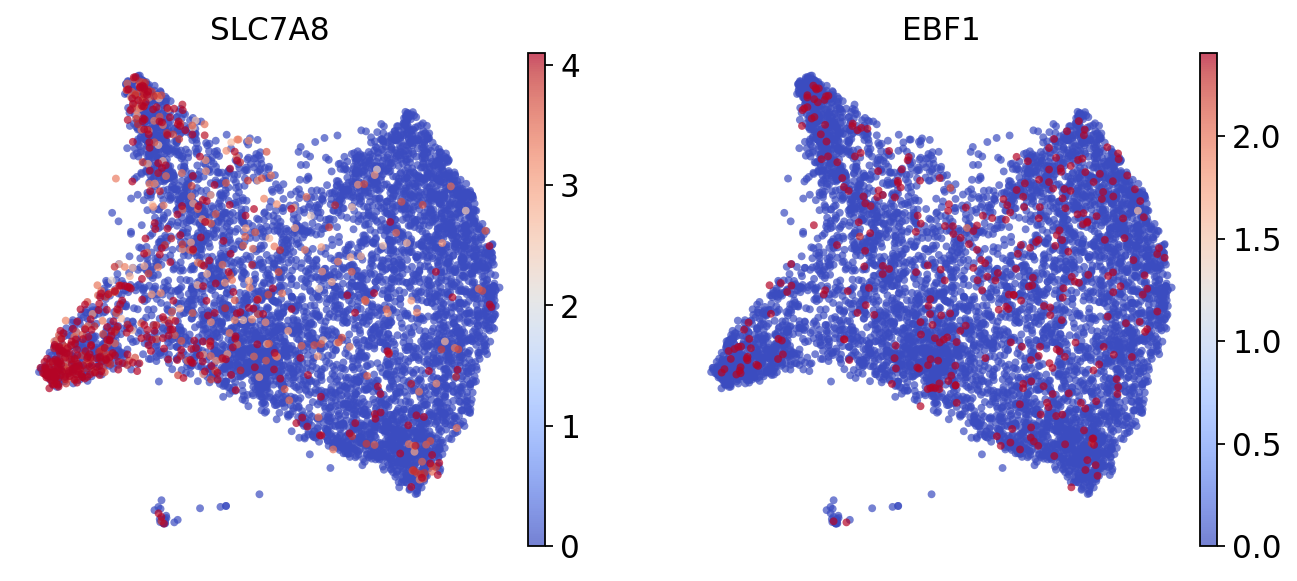

In [384]:
sc.pl.umap(rna_data, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=[ "latent_time"], color_map = 'coolwarm', vmin="p25", vmax="p95", use_raw=False)
sc.pl.umap(rna_data, frameon=False, size = 50, alpha = 0.7, add_outline=False,
        outline_width=(0.1,0), color=["SLC7A8", "EBF1"], color_map = 'coolwarm',  vmin="p05", vmax="p95", use_raw=False)         


### get the loading matrix

In [7]:
rnaloading = model.get_rna_loading()
rnaloading = rnaloading.T

In [9]:
import seaborn as sns

In [43]:
# 7: 200
# 18: 300
# 0: 300
# 3: 300
# 10: 100
# :10: 100

subloading = rnaloading[10:, :]
# subloading = rnaloading[7, :]

subloading = np.sum(subloading, axis=0)
subloading[subloading<0] = 0
print(subloading[subloading==0].shape)
indices = np.argsort(subloading)[::-1]
decouplegenelist = rna_data.var.iloc[indices,:]
decouplegenelist = decouplegenelist.loc[decouplegenelist.highly_variable==True, :].index[:200]
print(decouplegenelist)


(491,)
Index(['SLC30A1', 'IRX4', 'EBF1', 'BRCA1', 'SCHIP1', 'CADM1', 'ZFP740',
       'IMMP2L', 'ALDH1A3', 'PPFIBP2',
       ...
       'MEAF6', 'MCM3', 'MID2', 'MIOS', 'MLEC', 'MT2', 'MYB', 'PLET1', 'PLCE1',
       'POLD3'],
      dtype='object', name='index', length=200)


In [44]:
for g in decouplegenelist:
    print(g)

SLC30A1
IRX4
EBF1
BRCA1
SCHIP1
CADM1
ZFP740
IMMP2L
ALDH1A3
PPFIBP2
IFFO2
ARHGEF10L
SHROOM2
SLC7A8
ITGA6
LAMA3
MBIP
CSRP1
DDX19A
ZFP385A
PTN
PLBD1
MICAL2
PPFIBP1
PHACTR4
SLC39A6
TMTC1
SLC44A2
KRT73
EXOSC10
SYTL2
EPHA1
SIK1
SMPD3
SGK1
NAV2
RPGRIP1L
KALRN
RIPK1
TMEM183A
PPP1R14C
E2F7
EPHA4
RUNX1
POLA1
IRX2
PLCB1
CCDC34
TNFRSF19
UNC5B
ZFP750
PTCH1
PPP1R21
EML6
TGM6
PPP2R3C
KRT10
PTCH2
ST3GAL3
ZFP462
CTSC
ARHGEF26
NUAK1
SCFD1
NR4A1
KRT77
ITGAV
PTPRE
DSG4
NFIL3
CRYBG3
SLC24A3
RANBP1
AFF3
PNPT1
CERS4
LRP5
MPHOSPH8
FAM133B
KRT72
DNAJC2
MAF
ADAMTS9
XDH
KRT27
NIPAL2
DPAGT1
TIAM2
ISM1
GCLC
DLX2
SCUBE1
CLUH
TSPAN18
YTHDC2
SOAT1
KRT75
BMPER
GPNMB
DUSP10
NUP50
PECAM1
SCUBE2
GHITM
JUNB
TLE4
SKINT5
CLK3
SAT1
ARHGAP29
DSC1
HAS2
NFKBIZ
RABGGTB
CAMK2D
FRMD4A
PLK2
UNK
DNMT3A
GPATCH1
PLEKHH2
AKT2
SDAD1
POSTN
LYPD6
CENPE
ST14
DAPL1
DCUN1D1
DNA2
DNAJB1
FAP
DDIT4
TGFBI
FAM219A
DCN
DGCR8
EDNRA
THBS1
ERCC3
TM4SF1
DTYMK
TNFAIP3
EIF2B4
DNASE2A
F3
DOCK11
DOCK8
DSC2
TIMP3
BAMBI
B3GALNT2
VPS13C
BHLHE40
WDR47
ATAD2
A

10 (125, 9)


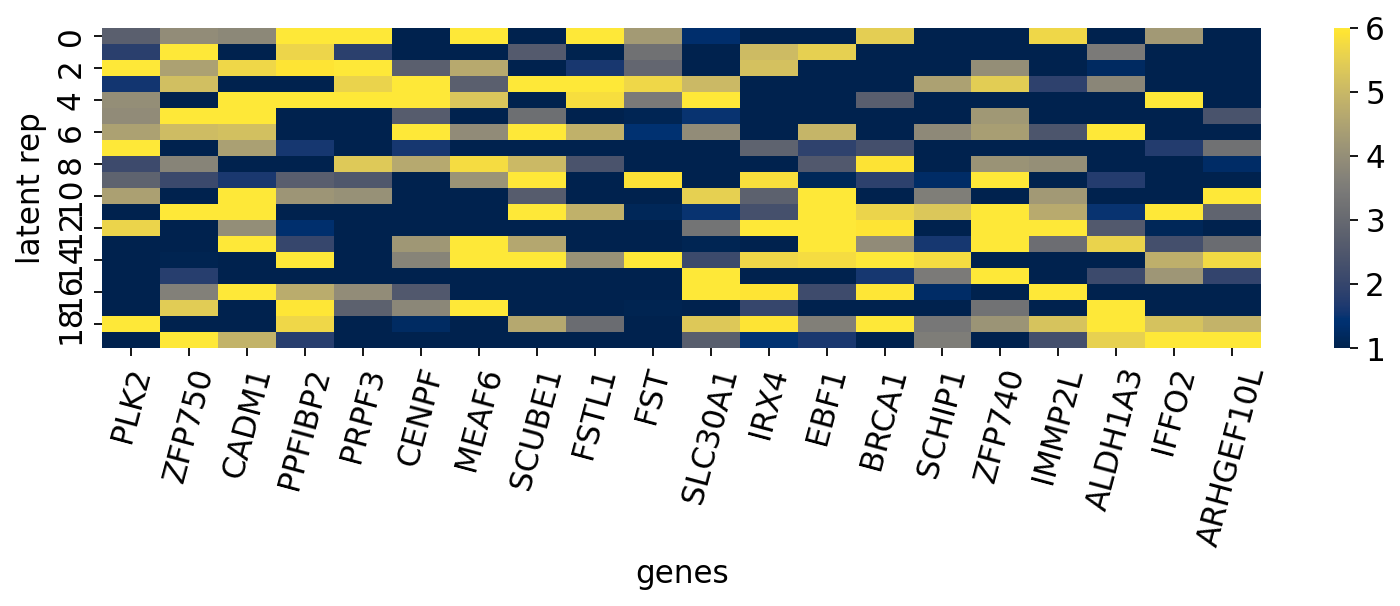

In [37]:
## decouple genelist
highly_genes = np.where(rna_data.var.highly_variable==True)[0]
subrna = rna_data.var.loc[rna_data.var.highly_variable==True,:]

subloading_decouple = rnaloading[10:, highly_genes]
subloading_couple = rnaloading[:10, highly_genes]

higlyloading = rnaloading[:, highly_genes]

decouple_genelist = subrna.iloc[np.where(np.sum(subloading_decouple,axis=0) > np.sum(subloading_couple,axis=0))[0],:]
couple_genelist = subrna.iloc[np.where(np.sum(subloading_couple,axis=0) > np.sum(subloading_decouple,axis=0))[0],:]

subloading_decouple2 = subloading_decouple[:, np.where(np.sum(subloading_decouple,axis=0) > np.sum(subloading_couple,axis=0))[0]]
subloading_decouple_whole = higlyloading[:, np.where(np.sum(subloading_decouple,axis=0) > np.sum(subloading_couple,axis=0))[0]]
subloading_decouple2 = np.sum(subloading_decouple2, axis=0)
subloading_decouple2[subloading_decouple2<0] = 0
indices = np.argsort(subloading_decouple2)[::-1]
genelen = 10
indices = indices[:genelen]
subloading_decouple_whole = subloading_decouple_whole[: ,indices]
decouple_genelist = decouple_genelist.iloc[indices,:]
decouple_genelist = decouple_genelist.index.tolist()

subloading_couple2 = subloading_couple[:, np.where(np.sum(subloading_couple,axis=0) > np.sum(subloading_decouple,axis=0))[0]]
subloading_couple_whole = higlyloading[:, np.where(np.sum(subloading_couple,axis=0) > np.sum(subloading_decouple,axis=0))[0]]
subloading_couple2 = np.sum(subloading_couple2, axis=0)
subloading_couple2[subloading_couple2<0] = 0
indices_couple = np.argsort(subloading_couple2)[::-1]
indices_couple = indices_couple[:genelen]
subloading_couple_whole = subloading_couple_whole[: ,indices_couple]
print(len(indices_couple), couple_genelist.shape)
couple_genelist = couple_genelist.iloc[indices_couple,:]
## highly variable
couple_genelist = couple_genelist.index.tolist()
genelist = np.concatenate([couple_genelist, decouple_genelist])


subloading = np.concatenate([subloading_couple_whole, subloading_decouple_whole], axis=1)
plt.figure(figsize=(10,4))
save_path="figs/Hair/20_aligned/loading_couple_decouple.png"
hm = sns.heatmap(subloading, cmap="cividis",vmin=1, vmax=6, xticklabels=genelist)
# hm.set(xticklabels=genelist) 
plt.xticks(rotation=75)
hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")
plt.tight_layout()
plt.savefig(save_path, dpi=300)



In [40]:
## couple genelist

subloading = rnaloading[:10, :]
subloading = np.sum(subloading, axis=0)
subloading[subloading<0] = 0
indices = np.argsort(subloading)[::-1]
couple_genelist = rna_data.var.iloc[indices,:]
couple_genelist = couple_genelist.loc[couple_genelist.highly_variable==True, :].index[:200]


In [52]:
for i in range(20):
    subloading = rnaloading[i, :]
    subloading[subloading<0] = 0
    indices = np.argsort(subloading)[::-1]
    genelist = rna_data.var.iloc[indices,:]
    genelist = genelist.index[:200]
    filename = "results/hair_genelist/expr_latent_"+str(i)+".csv"
    df = pd.DataFrame(genelist)
    df.to_csv(filename, index=False,header=False)


In [42]:
for g in genelist:
    print(g)

PLK2
ZFP750
CADM1
PPFIBP2
PRPF3
CENPF
MEAF6
SCUBE1
FSTL1
FST
WDR47
RIN2
COL1A2
CPSF3
CALD1
HEG1
DNAJB1
CENPE
GPNMB
ORC1
MAK16
SCUBE2
SKINT5
CRYBG3
NUP50
IGSF9
MAF
DNMT3A
SLC7A8
DTYMK
ZFP385A
SYTL2
ISM1
LIG1
FAM219A
DGCR8
CSRP1
ST14
AGL
UNC5B
UNK
FRMD4B
RPGRIP1L
CPM
HAS2
PTPRE
MYB
TTYH2
DSC2
VPS13C
CTSC
RUNX1
LMO7
KRT27
SHROOM2
IRX2
YTHDC2
ZFP740
SHH
EPHA1
KRT14
SAT1
ERCC3
FAM133B
LYPD6
CXCL14
MIOS
GCLC
ARHGEF26
SHROOM3
PGRMC2
F3
NFIL3
PPP2R3C
BMPER
MAGI3
PLBD1
KRT73
DNASE2A
KRT35
CNKSR3
DSG4
PPL
DDX19A
CLK2
TBC1D9B
ZFP462
BAMBI
SLC16A7
IRX4
SLC30A1
FAP
RABGGTB
KRT77
KIT
DCUN1D1
RND3
BHLHE40
EIF2B4
IPMK
SCFD1
HOXC13
NEDD9
IGFBP5
PLEKHH2
FRMD4A
ANXA1
COL1A1
TIAM2
PLCB1
SEMA6A
EML6
HEPHL1
SOAT1
PPP1R21
LRP4
CCDC34
TLE4
KRT10
ITGAV
MYH14
KRT72
BRCA1
REEP5
EBF1
TGFBI
CWF19L1
CTPS
CTDSP2
TGM6
SMPD3
TMTC1
TMEM183A
TM4SF1
EPHA4
COL23A1
TIMP3
THBS1
DNA2
DNAJC2
ST8SIA6
ST3GAL3
DOCK11
DOCK8
DPAGT1
E2F7
DSC1
DLX2
DAPL1
DCN
DDIT4
EDNRA
DUSP10
NTN1
ARHGAP29
ARHGEF10L
ATAD2
XDH
B3GALNT2
ABCF2
ADAMTS9

In [ ]:
## decouple genelist
highly_genes = np.where(rna_data.var.highly_variable==True)[0]
subrna = rna_data.var.loc[rna_data.var.highly_variable==True,:]

subloading_decouple = rnaloading[:10, highly_genes]
subloading_couple = rnaloading[10:, highly_genes]
higlyloading = rnaloading[:, highly_genes]



decouple_genelist = subrna.iloc[np.where(np.all(subloading_decouple,axis=0) > 0, axis=0)[0],:]
couple_genelist = subrna.iloc[np.where(np.sum(subloading_couple,axis=0) > np.sum(subloading_decouple,axis=0))[0],:]

subloading_decouple2 = subloading_decouple[:, np.where(np.sum(subloading_decouple,axis=0) > np.sum(subloading_couple,axis=0))[0]]
subloading_decouple_whole = higlyloading[:, np.where(np.sum(subloading_decouple,axis=0) > np.sum(subloading_couple,axis=0))[0]]
subloading_decouple2 = np.sum(subloading_decouple2, axis=0)
subloading_decouple2[subloading_decouple2<0] = 0
indices = np.argsort(subloading_decouple2)[::-1]
genelen = 20
indices = indices[:genelen]
subloading_decouple_whole = subloading_decouple_whole[: ,indices]
decouple_genelist = decouple_genelist.iloc[indices,:]
decouple_genelist = decouple_genelist.index.tolist()


subloading_couple2 = subloading_couple[:, np.where(np.sum(subloading_couple,axis=0) > np.sum(subloading_decouple,axis=0))[0]]
subloading_couple_whole = higlyloading[:, np.where(np.sum(subloading_couple,axis=0) > np.sum(subloading_decouple,axis=0))[0]]
subloading_couple2 = np.sum(subloading_couple2, axis=0)
subloading_couple2[subloading_couple2<0] = 0
indices_couple = np.argsort(subloading_couple2)[::-1]
indices_couple = indices_couple[:genelen]
subloading_couple_whole = subloading_couple_whole[: ,indices_couple]
print(len(indices_couple), couple_genelist.shape)
couple_genelist = couple_genelist.iloc[indices_couple,:]
## highly variable
couple_genelist = couple_genelist.index.tolist()
genelist = np.concatenate([decouple_genelist, couple_genelist])


subloading = np.concatenate([subloading_decouple_whole, subloading_couple_whole], axis=1)
plt.figure(figsize=(25,4))
hm = sns.heatmap(subloading, cmap="cividis",vmin=1, vmax=6)
hm.set(xticklabels=genelist) 
plt.xticks(rotation=45)
hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")


(20, 20)


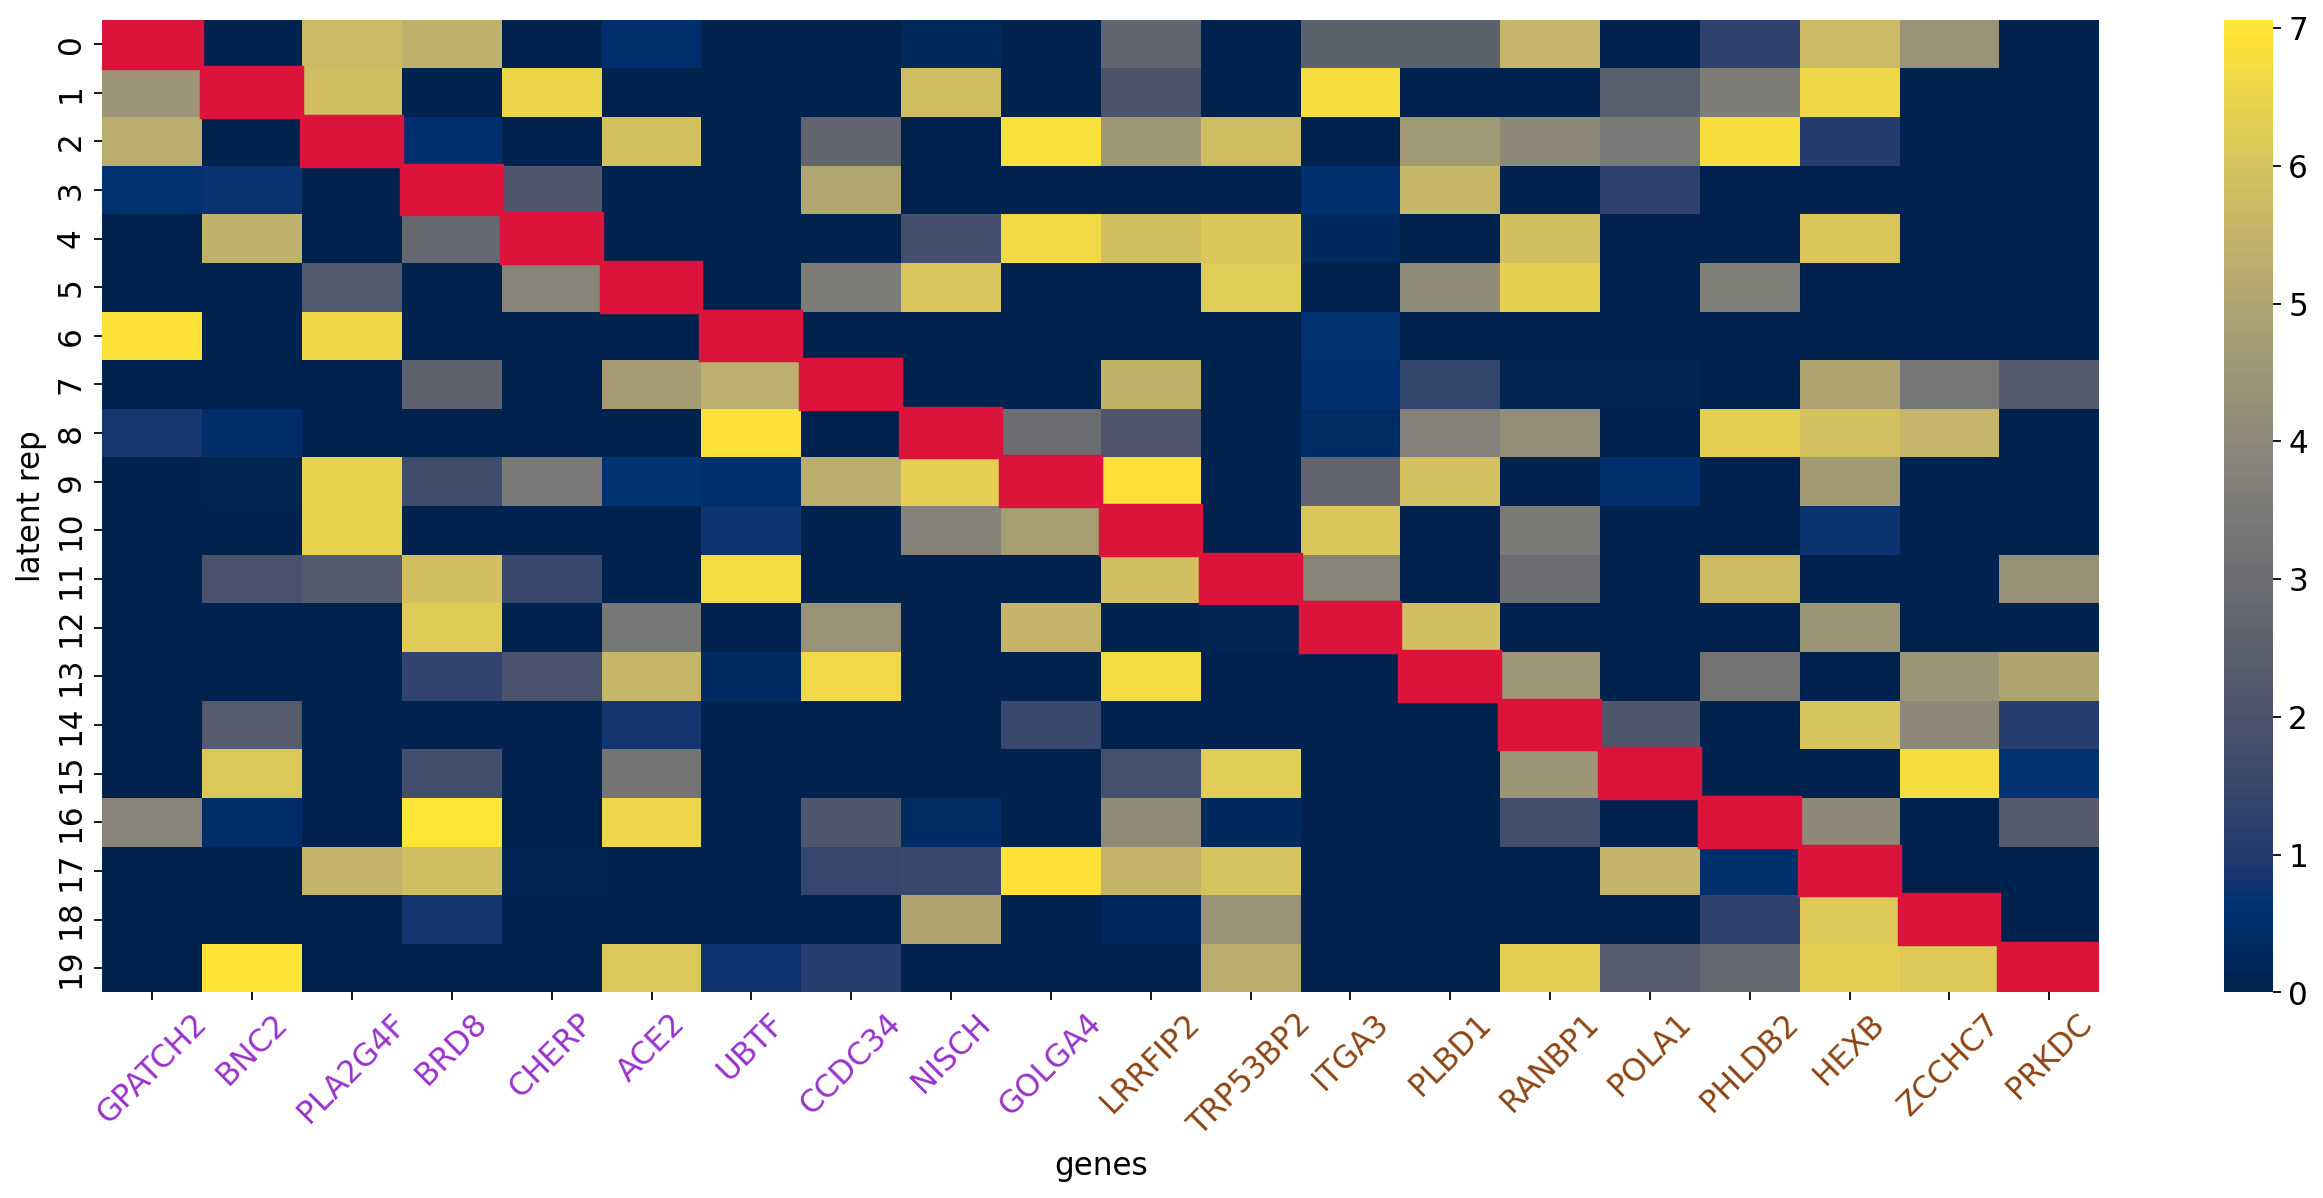

In [53]:
from matplotlib.patches import Rectangle


genelist = []
gene_index = []
gene_num_latent = 1
subloadings= []
genelist1 = []
genelist2 = []

for i in range(20):
    subloading = rnaloading[i, :]
    indices = np.argsort(subloading, axis=0)[::-1]
    indices = indices[:gene_num_latent]
    gene_names = rna_data.var.index.to_numpy()[indices]
    genelist = np.concatenate([genelist, gene_names])
    gene_index = np.concatenate([gene_index, indices])
    subloadings.append(rnaloading[:, indices])
    # subloadings = np.append(subloadings, rnaloading[:, indices], axis=1)
subloadings = np.array(subloadings)
subloadings = subloadings.reshape(20, -1)

print(subloadings.shape)


fig,ax = plt.subplots(figsize=(20, 8))

hm = sns.heatmap(subloadings, cmap="cividis", vmin=0)
hm.set(xticklabels=genelist) 
plt.xticks(rotation=90)
hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")
for t in plt.gca().get_xticklabels():
    if t.get_text() in genelist[:10]:
        t.set_color('darkorchid') 
    if t.get_text() in genelist[10:]:
        t.set_color('saddlebrown') 


for col in range(subloadings.shape[1]):
    position = np.argmax(subloadings[:, col])
    position2 = np.argsort(subloadings[:, col])[-2]
    ax.add_patch(Rectangle((col, position),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))
    # ax.add_patch(Rectangle((col, position2),1,1, fill=True, edgecolor='yellow', lw=1))
save_path="figs/Hair/20_aligned/loading_latent_max.png"
plt.xticks(rotation=45)
plt.savefig(save_path, dpi=300)


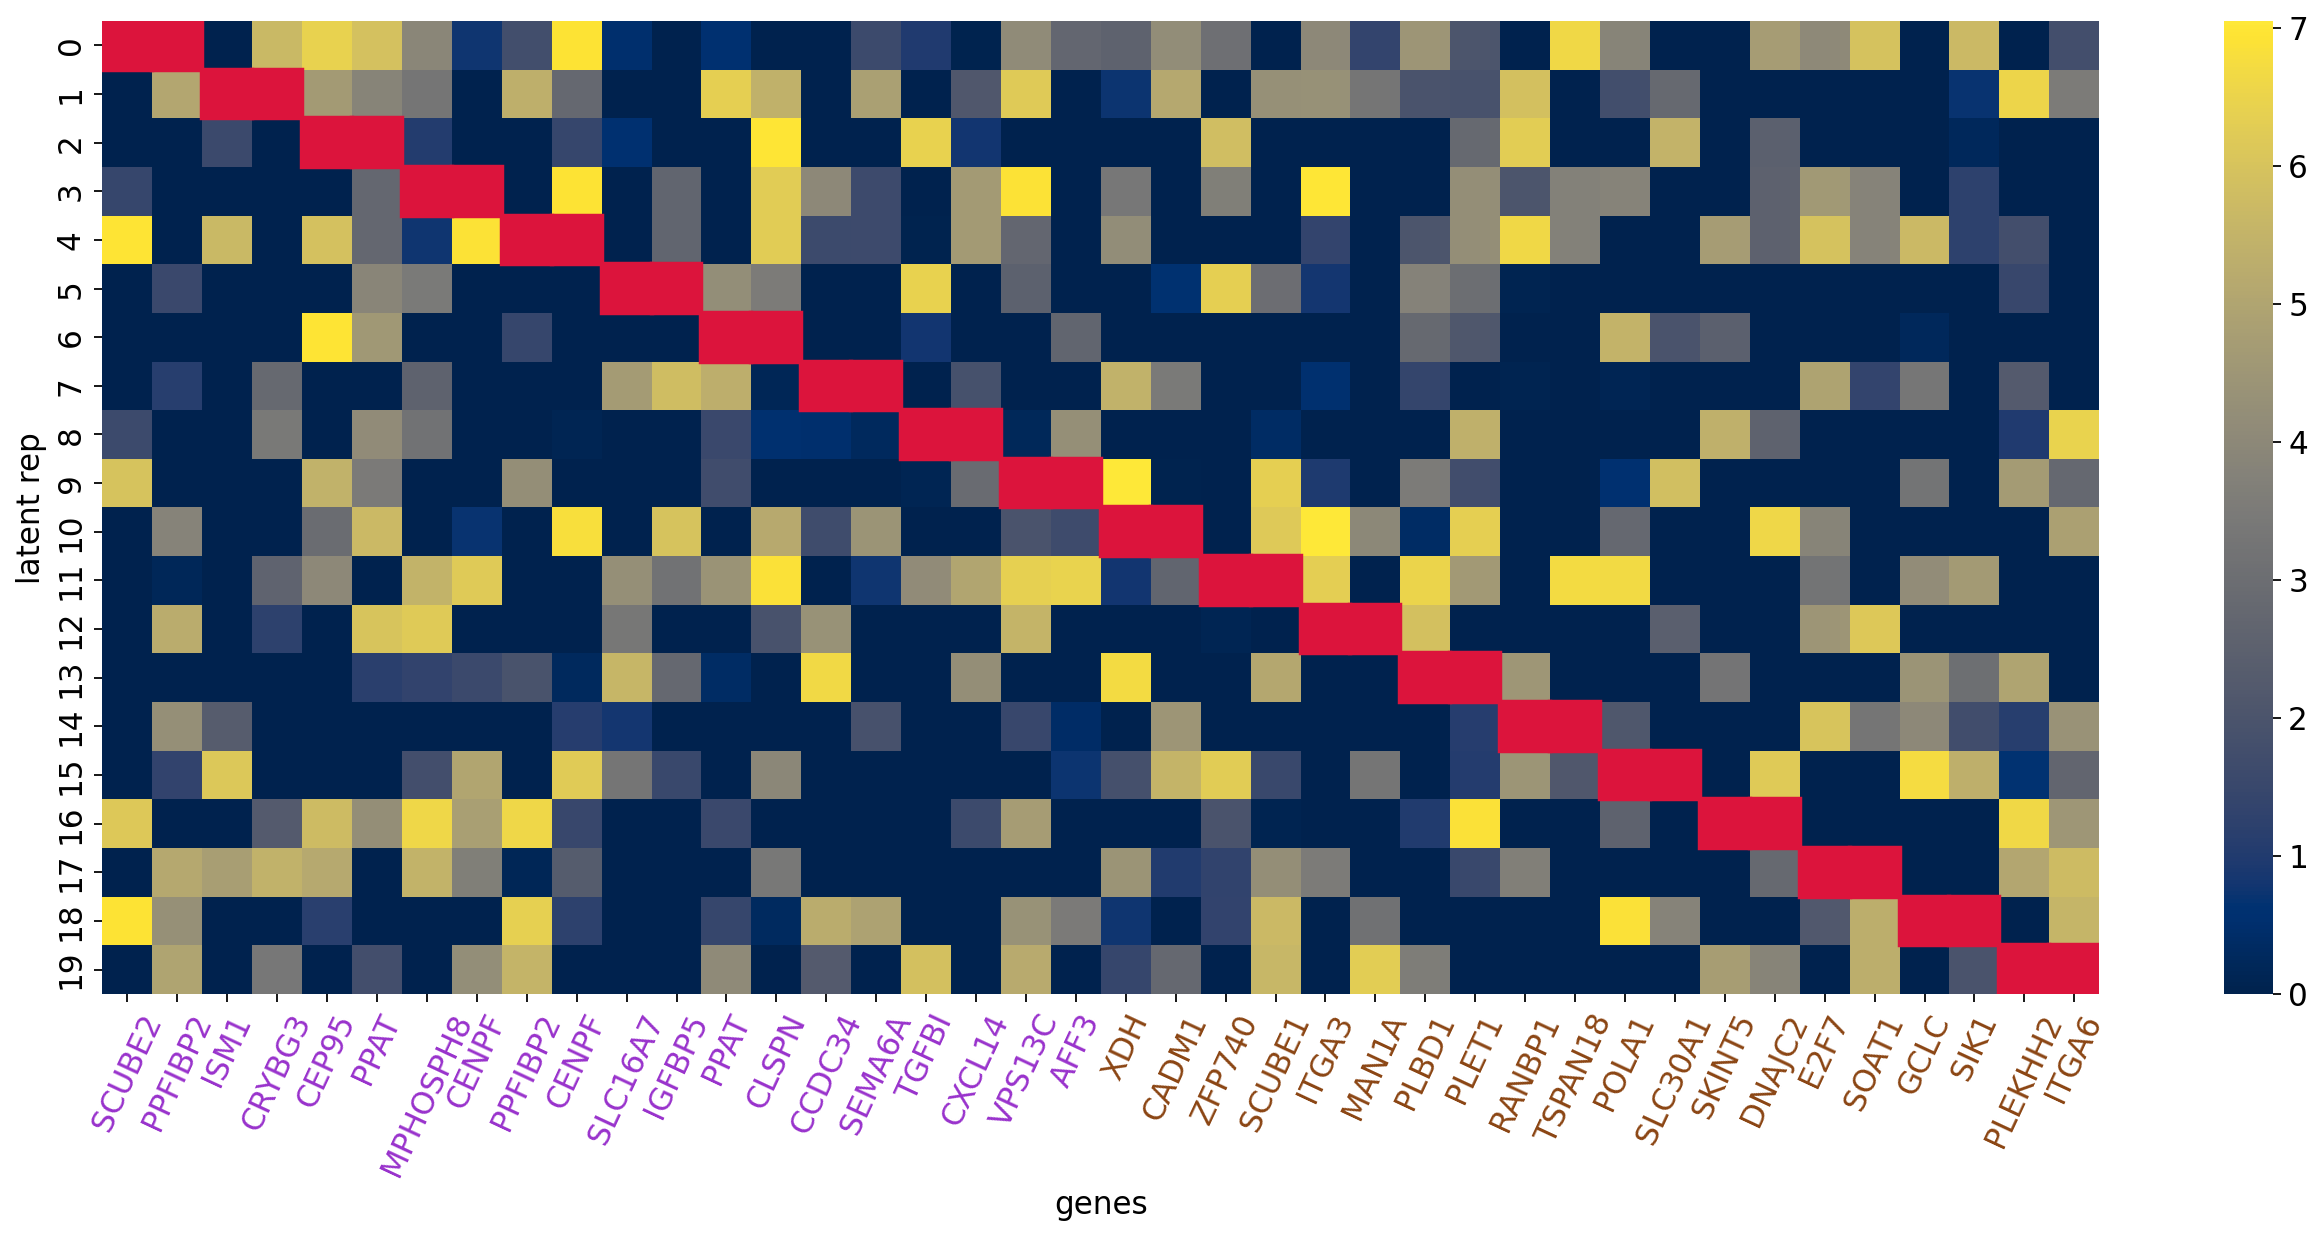

In [22]:
highly_genes = np.where(rna_data.var.highly_variable==True)[0]
subrna = rna_data.var.loc[rna_data.var.highly_variable==True,:]
higlyloading = rnaloading[:, highly_genes]

genelist = []
gene_index = []
gene_num_latent = 2
subloadings= []
genelist1 = []
genelist2 = []

for i in range(20):
    subloading = higlyloading[i, :]

    indices = np.argsort(subloading, axis=0)[::-1]
    if i==10:
        indices = indices[1:gene_num_latent+1]
    else:
        indices = indices[:gene_num_latent]
    # if i==16:
    #     indices =np.where(rna_data.var.index=="WNT5A")[0]
    gene_names =subrna.index.to_numpy()[indices]
    genelist = np.concatenate([genelist, gene_names])
    gene_index = np.concatenate([gene_index, indices])
    subloadings.append(higlyloading[:, indices])
    # subloadings = np.append(subloadings, rnaloading[:, indices], axis=1)
subloadings = np.array(subloadings)
subloadings = subloadings.reshape(20, -1)

fig,ax = plt.subplots(figsize=(20, 8))

hm = sns.heatmap(subloadings, cmap="cividis", vmin=0)
hm.set(xticklabels=genelist) 
plt.xticks(rotation=90)
hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")
for t in plt.gca().get_xticklabels():
    if t.get_text() in genelist[:20]:
        t.set_color('darkorchid') 
    if t.get_text() in genelist[20:]:
        t.set_color('saddlebrown') 

row=0
col=0
while row < subloadings.shape[1]:
    # position = np.argmax(subloadings[row ,:])
    # position2 = np.argsort(subloadings[row, :])[-2]
    for num in range(gene_num_latent):
        # print((row, col+num))
        ax.add_patch(Rectangle((row+num, col),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))
    # ax.add_patch(Rectangle((row+1, col),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))
    # ax.add_patch(Rectangle((row, col),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))

    
    row += gene_num_latent
    col += 1
    # ax.add_patch(Rectangle((position2, row),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))

    # ax.add_patch(Rectangle((col, position2),1,1, fill=True, edgecolor='yellow', lw=1))
save_path="figs/Hair/20_aligned/loading_latent_highly_max2.png"
plt.xticks(rotation=65)
plt.savefig(save_path, dpi=300)


[[16]
 [ 8]
 [11]
 [ 9]
 [ 6]
 [15]
 [18]
 [17]
 [ 0]
 [ 5]
 [12]
 [ 1]
 [10]
 [ 7]
 [14]
 [ 4]
 [ 3]
 [19]
 [ 2]
 [13]]
[[[ 5.854834  ]]

 [[ 5.350803  ]]

 [[ 4.98021   ]]

 [[ 4.4944196 ]]

 [[ 3.0267527 ]]

 [[ 2.6723194 ]]

 [[ 2.5838706 ]]

 [[ 2.5280905 ]]

 [[ 1.8285764 ]]

 [[ 1.825256  ]]

 [[ 0.59074754]]

 [[ 0.5764024 ]]

 [[-0.91491365]]

 [[-3.2269657 ]]

 [[-3.7376757 ]]

 [[-3.8354952 ]]

 [[-5.5888553 ]]

 [[-6.2388854 ]]

 [[-6.4711776 ]]

 [[-6.9808836 ]]]


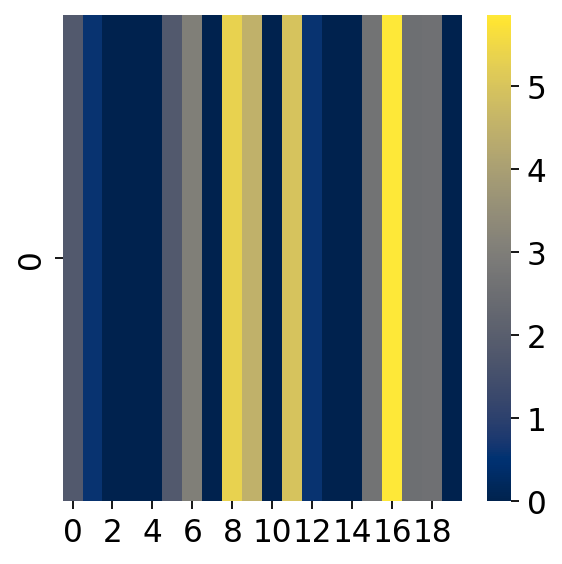

In [144]:
gene_num_latent = np.where(rna_data.var.index=="WNT5A")[0]
higlyloading = rnaloading[:, gene_num_latent]
indexes = np.argsort(higlyloading,axis=0)[::-1]
print(indexes)
print(higlyloading[indexes])


hm = sns.heatmap(higlyloading.transpose(), cmap="cividis", vmin=0)
# hm.set(xticklabels=genelist) 
# plt.xticks(rotation=90)
# hm.set(xlabel="genes")
# hm.set(ylabel = "latent rep")
# for t in plt.gca().get_xticklabels():
#     if t.get_text() in genelist[:20]:
#         t.set_color('darkorchid') 
#     if t.get_text() in genelist[20:]:
#         t.set_color('saddlebrown') 

# row=0
# col=0
# while row < subloadings.shape[1]:
#     # position = np.argmax(subloadings[row ,:])
#     # position2 = np.argsort(subloadings[row, :])[-2]
#     for num in range(gene_num_latent):
#         # print((row, col+num))
#         ax.add_patch(Rectangle((row+num, col),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))
#     # ax.add_patch(Rectangle((row+1, col),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))
#     # ax.add_patch(Rectangle((row, col),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))

    
#     row += gene_num_latent
#     col += 1
#     # ax.add_patch(Rectangle((position2, row),1,1, fill=True, edgecolor='crimson', lw=2, fc="crimson"))

#     # ax.add_patch(Rectangle((col, position2),1,1, fill=True, edgecolor='yellow', lw=1))
# save_path="figs/Hair/20_aligned/loading_latent_highly_max.png"
# plt.xticks(rotation=65)
# plt.savefig(save_path, dpi=300)


In [ ]:
higlyloading = rnaloading[16, :100 ]
indexes = np.argsort(higlyloading,axis=0)[::-1]
hm = sns.heatmap(higlyloading, cmap="cividis", vmin=0)

(20, 959)
(3, 20, 8)


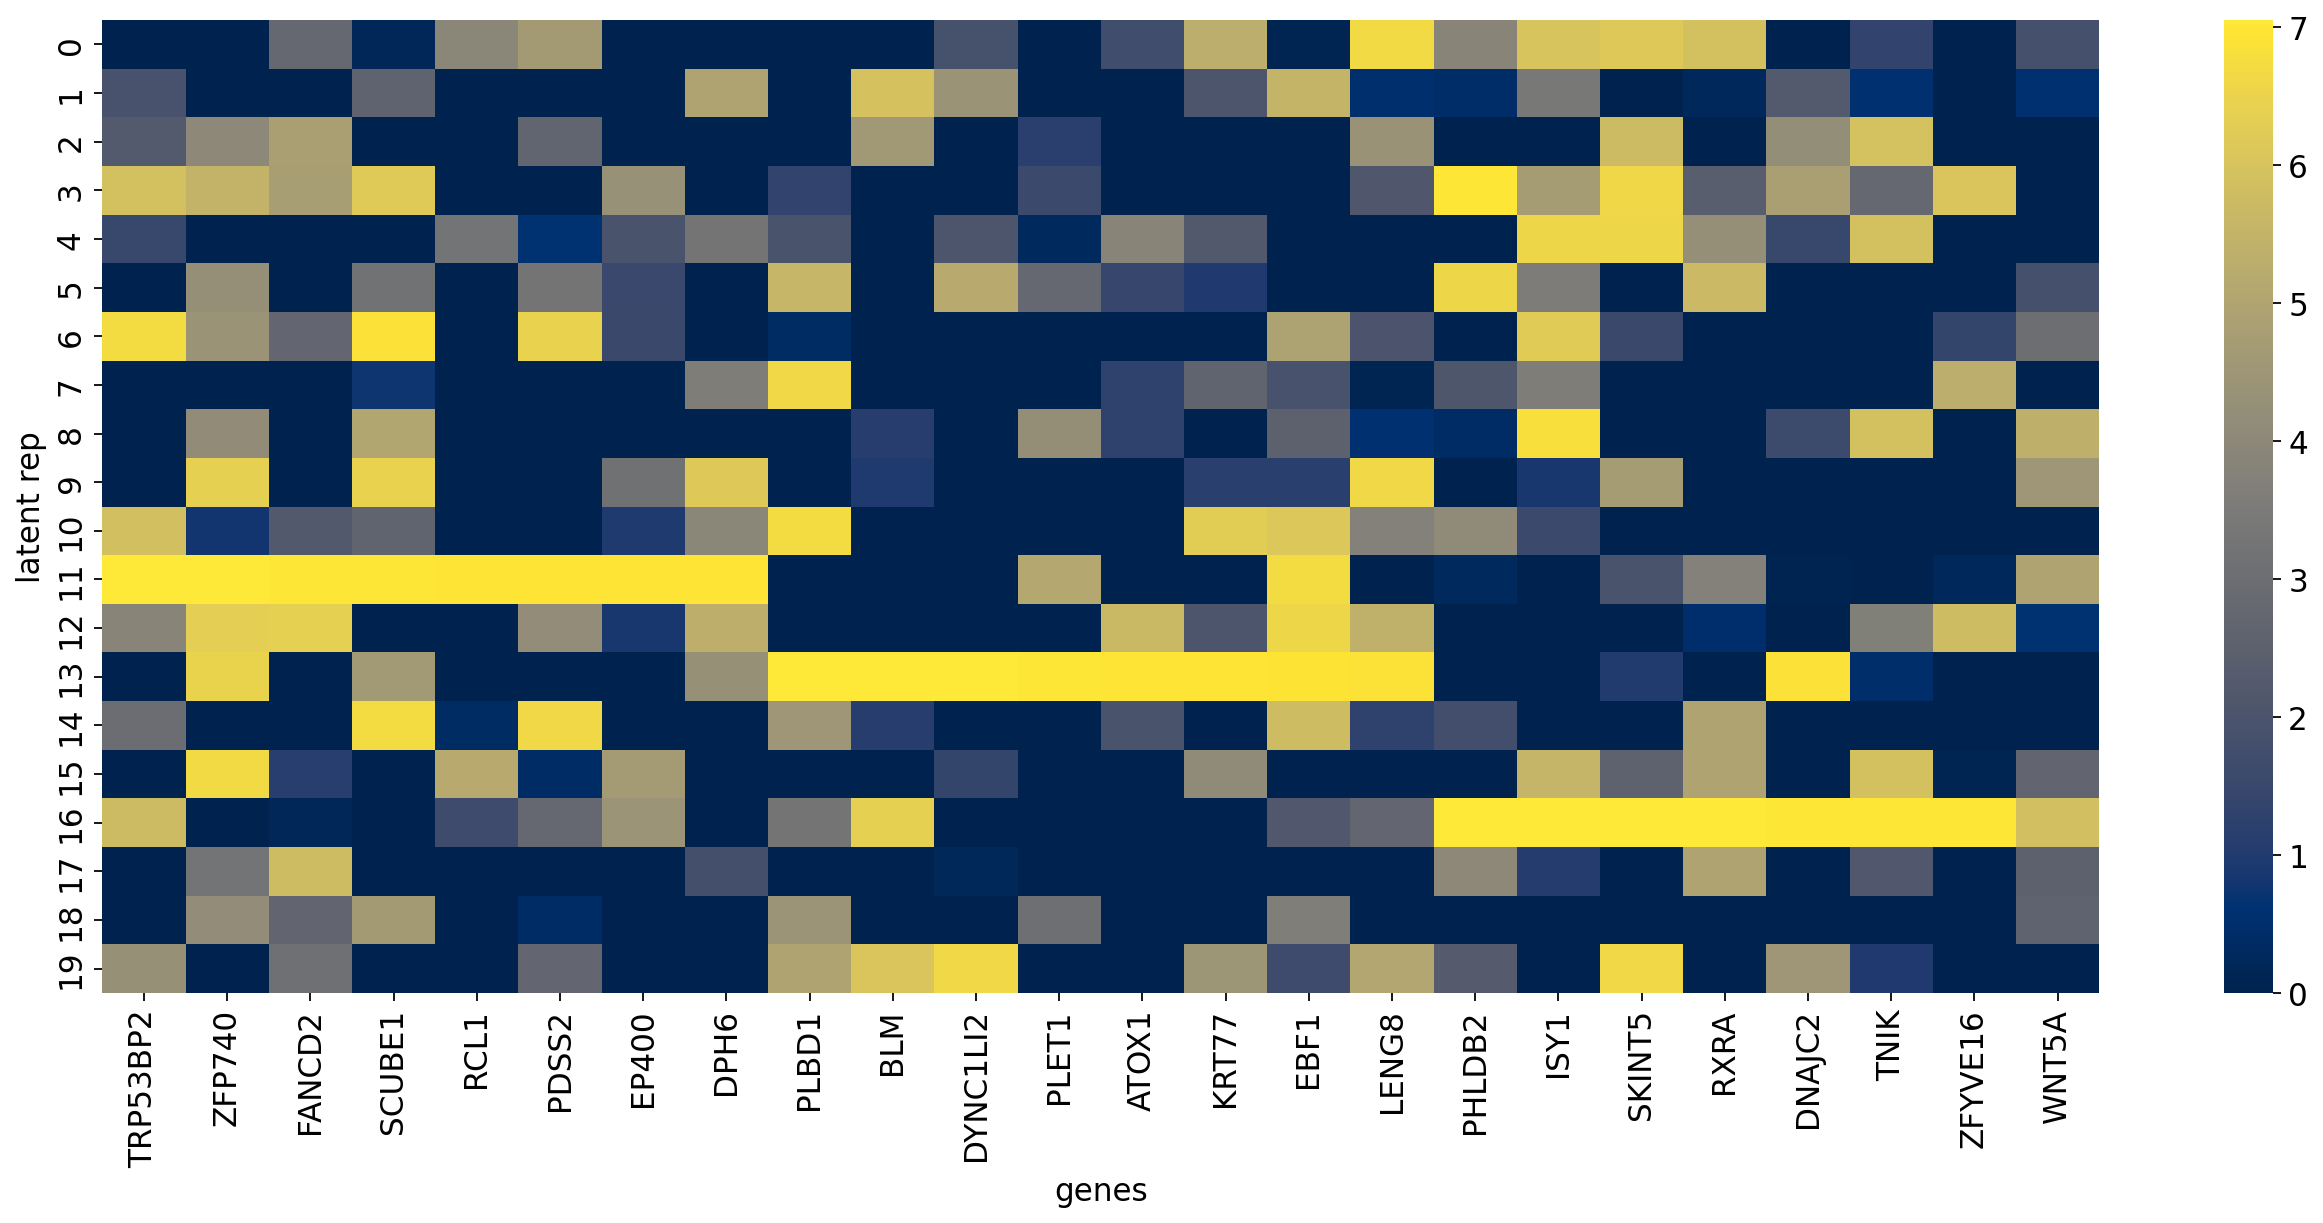

In [57]:
print(rnaloading.shape)
latent_index = [11,13,16]
# subrna = rna_data.var.loc[rna_data.var.highly_variable==True,:]
subrna = rna_data.var
# higlyloading = rnaloading[:, highly_genes]
higlyloading = rnaloading


genelist = []
gene_index = []
gene_num_latent = 8
subloadings= []
genelist1 = []
genelist2 = []

for i in latent_index:
    subloading = higlyloading[i, :]
    indices = np.argsort(subloading, axis=0)[::-1]
    indices = indices[:gene_num_latent]
    if i==16:
        index = np.where(rna_data.var.index=="WNT5A")[0]
        indices[-1] = index
    gene_names =subrna.index.to_numpy()[indices]
    genelist = np.concatenate([genelist, gene_names])
    gene_index = np.concatenate([gene_index, indices])
    temploading = higlyloading[:, indices]
    subloadings.append(higlyloading[:, indices])

subloadings = np.array(subloadings)
print(subloadings.shape)
subloadings = np.concatenate(subloadings, axis=-1)
# print(genelist)
fig,ax = plt.subplots(figsize=(20, 8))

hm = sns.heatmap(subloadings, cmap="cividis", vmin=0)
hm.set(xticklabels=genelist) 
plt.xticks(rotation=90)
hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")

save_path="figs/Hair/20_aligned/loading_latent_highly_max_picked.png"
# plt.xticks(rotation=65)
# plt.yticks(labels=[str(e) for e in latent_index])

plt.savefig(save_path, dpi=300)

(20, 959)
(2, 20, 20)


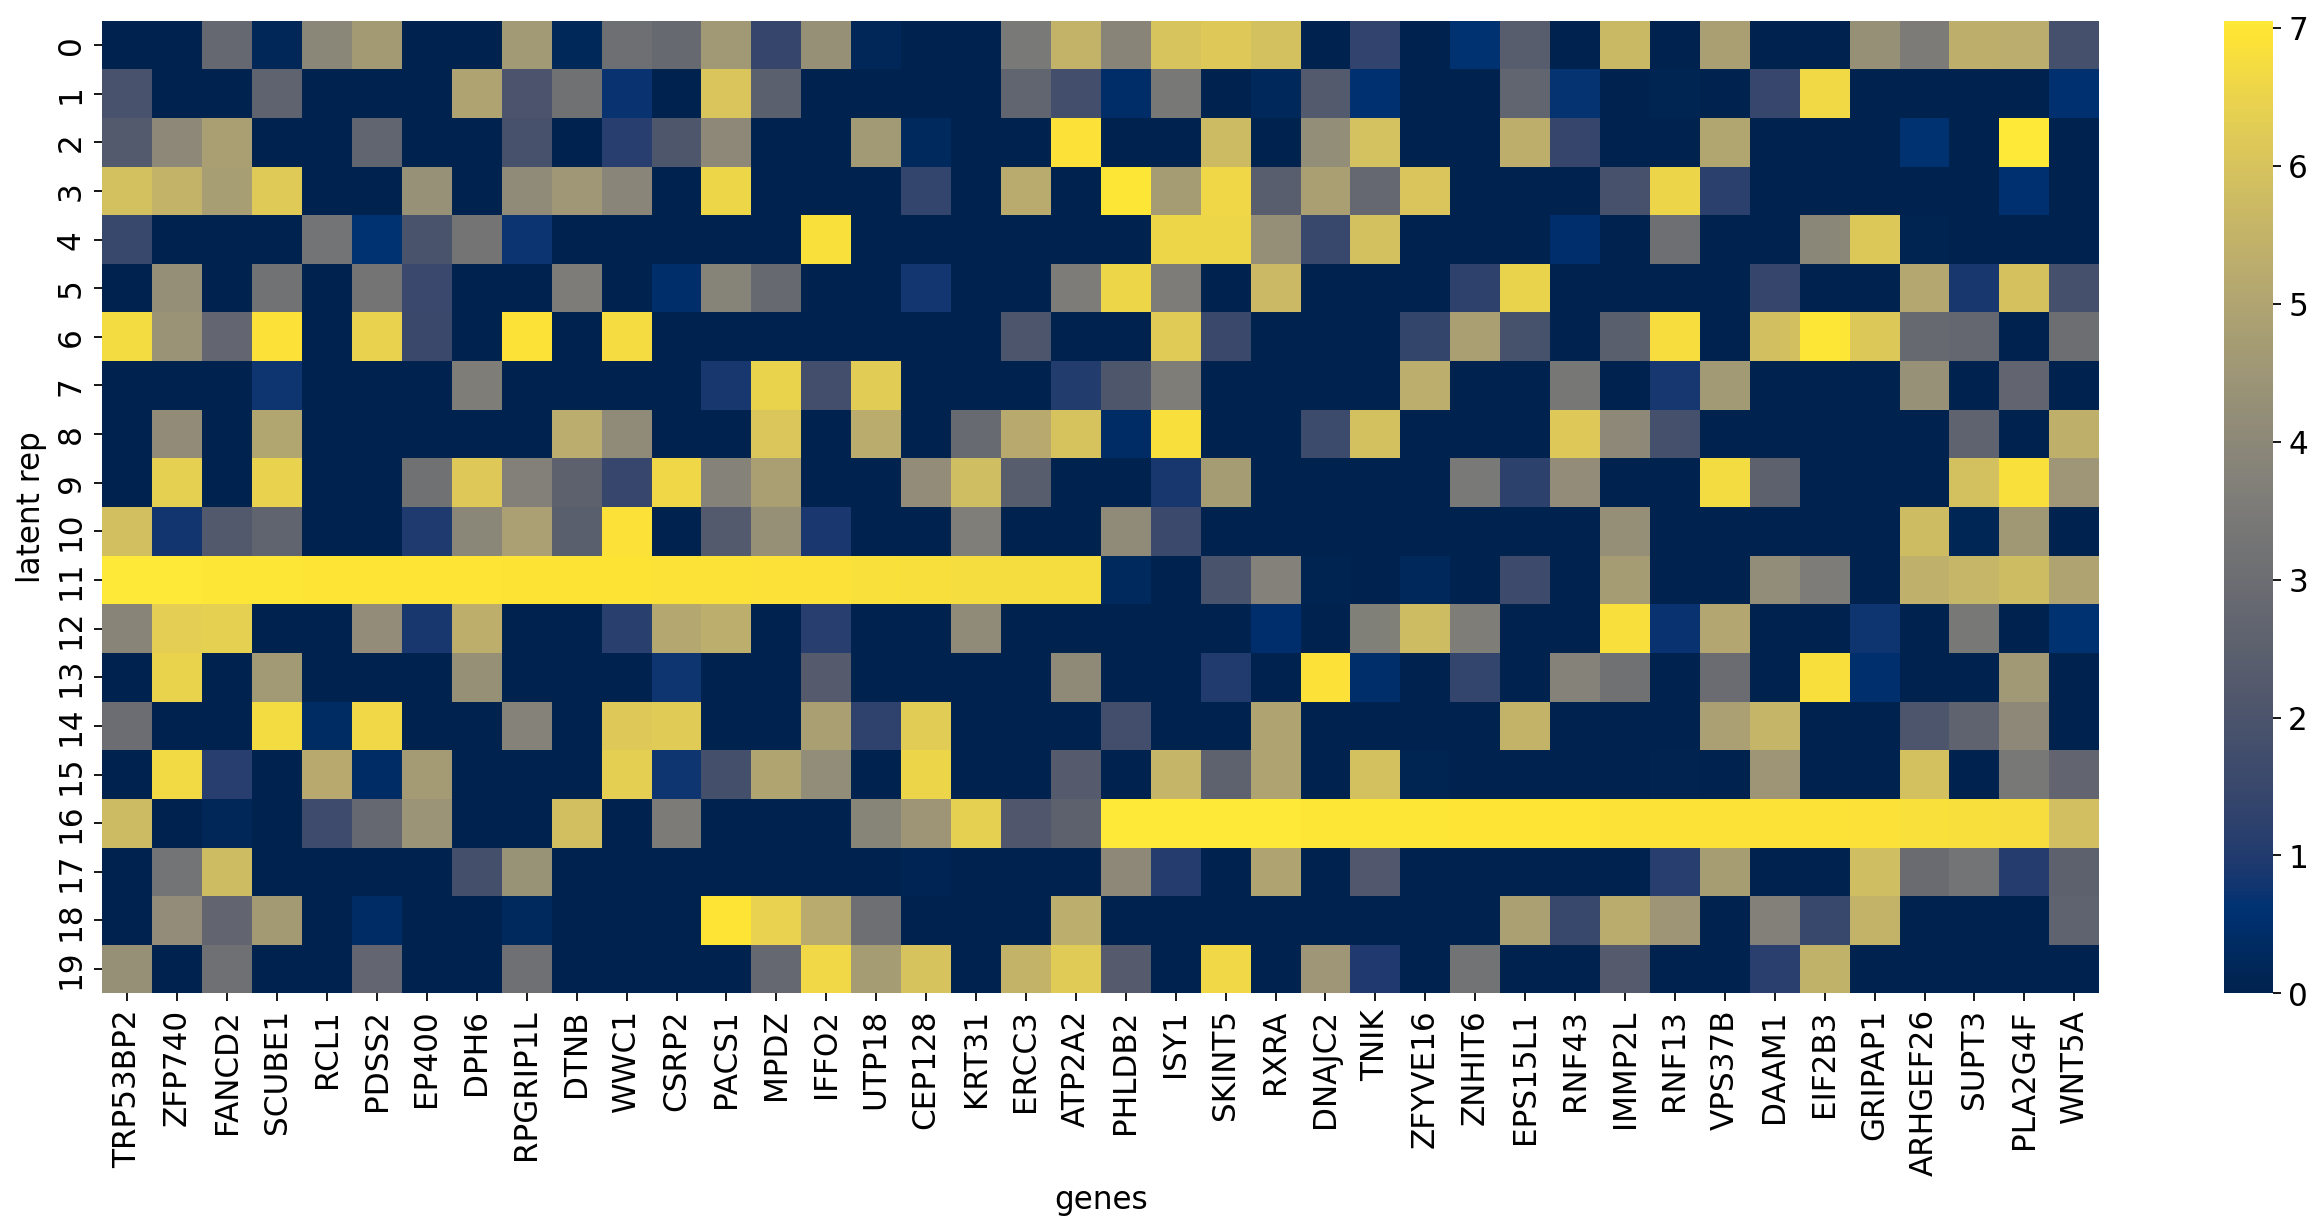

In [125]:
print(rnaloading.shape)
latent_index = [11,16]
# subrna = rna_data.var.loc[rna_data.var.highly_variable==True,:]
subrna = rna_data.var
# higlyloading = rnaloading[:, highly_genes]
higlyloading = rnaloading


genelist = []
gene_index = []
gene_num_latent = 20
subloadings= []
genelist1 = []
genelist2 = []

for i in latent_index:
    subloading = higlyloading[i, :]
    indices = np.argsort(subloading, axis=0)[::-1]
    indices = indices[:gene_num_latent]
    if i==16:
        index = np.where(rna_data.var.index=="WNT5A")[0]
        indices[-1] = index
    gene_names =subrna.index.to_numpy()[indices]
    genelist = np.concatenate([genelist, gene_names])
    gene_index = np.concatenate([gene_index, indices])
    temploading = higlyloading[:, indices]
    subloadings.append(higlyloading[:, indices])

subloadings = np.array(subloadings)
print(subloadings.shape)
subloadings = np.concatenate(subloadings, axis=-1)
# print(genelist)
fig,ax = plt.subplots(figsize=(20, 8))

hm = sns.heatmap(subloadings, cmap="cividis", vmin=0)
hm.set(xticklabels=genelist) 
plt.xticks(rotation=90)
hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")

save_path="figs/Hair/20_aligned/loading_latent_highly_max_picked1116.png"
# plt.xticks(rotation=65)
# plt.yticks(labels=[str(e) for e in latent_index])

plt.savefig(save_path, dpi=300)

In [167]:
[e for e in rna_data.var.index if "SCT" in e]

[]

In [144]:
genelist_GL = ["LEF1","MT2", "DCN", "ID3"]
genelist_IRS = ["KRT71", "KRT27", "TCHH", "KRT73", "KRT72"]
genelist_CX = ["KRT35", "DAPL1", "HSPBAP1", "KRT31"]
genelist_MED = ["ALDH1A3", "KRT75", "KITL"]


In [165]:
genelist_GL = ["LEF1","MT2", "DCN"]
genelist_IRS = ["KRT71", "KRT27",  "KRT73"]
genelist_CX = ["DAPL1", "KRT31","WNT5A"]
genelist_MED = ["ALDH1A3", "KRT75", "GPNMB"]


(20, 959)
(12, 20, 1)


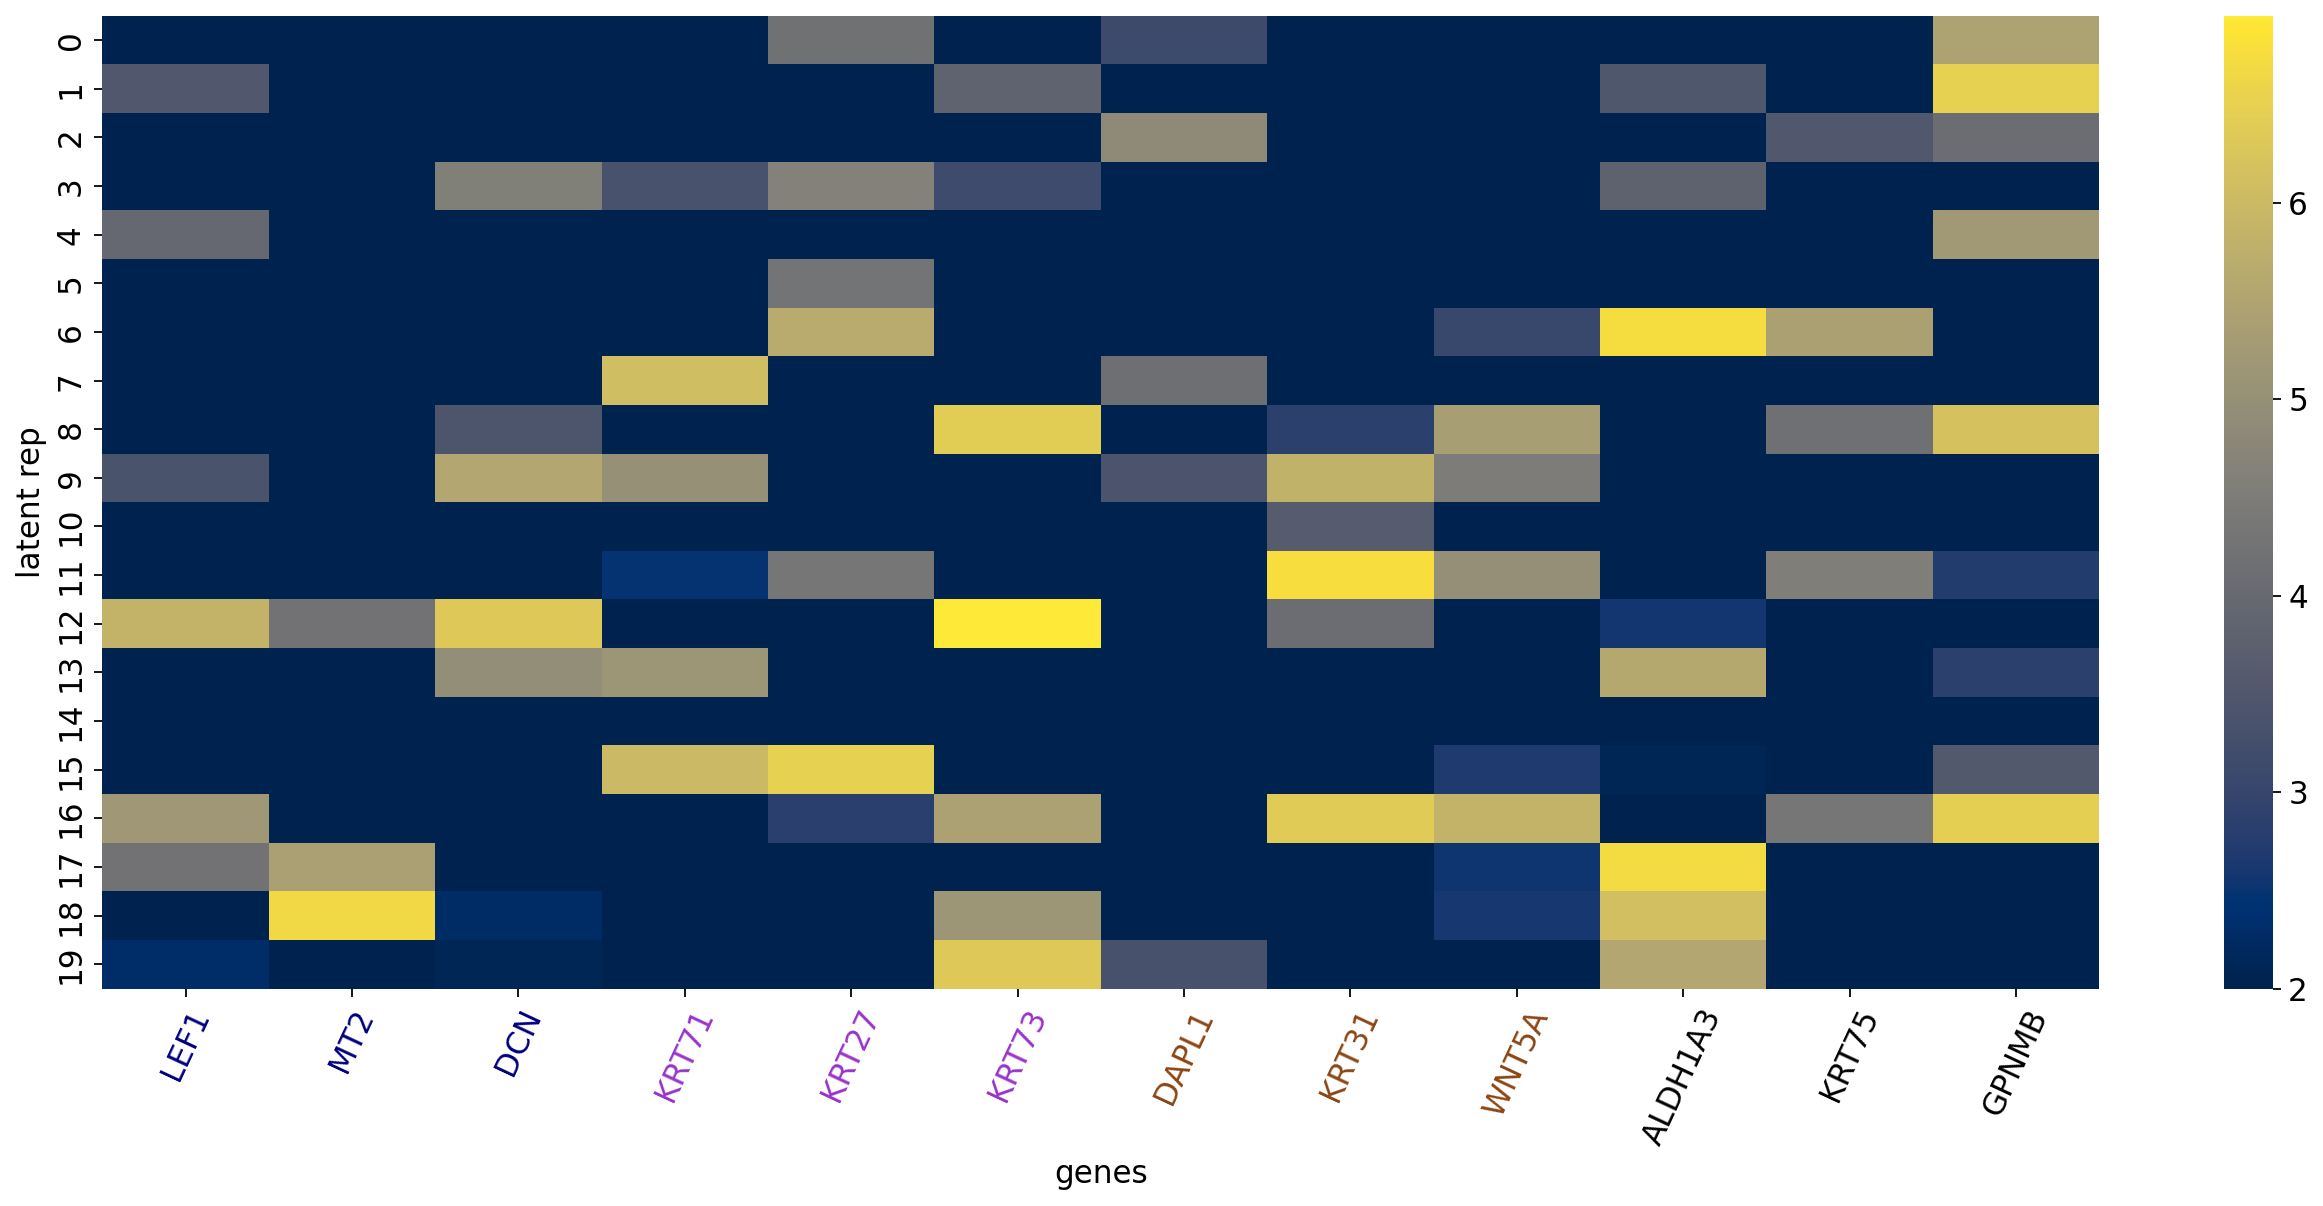

In [166]:
print(rnaloading.shape)
gene_names = np.concatenate([genelist_GL, genelist_IRS, genelist_CX, genelist_MED])
subrna = rna_data.var
higlyloading = rnaloading


genelist = []
gene_index = []
gene_num_latent = 8
subloadings= []
genelist1 = []
genelist2 = []

index = np.where

for gene in gene_names:
    indices =  np.where(rna_data.var.index==gene)[0]
    genelist = np.concatenate([genelist, gene_names])
    gene_index = np.concatenate([gene_index, indices])
    temploading = higlyloading[:, indices]
    subloadings.append(higlyloading[:, indices])

subloadings = np.array(subloadings)
print(subloadings.shape)
subloadings = np.concatenate(subloadings, axis=-1)
# print(genelist)
fig,ax = plt.subplots(figsize=(20, 8))



hm = sns.heatmap(subloadings, cmap="cividis", vmin=2)
hm.set(xticklabels=gene_names) 
plt.xticks(rotation=90)

for t in plt.gca().get_xticklabels():
    if t.get_text() in genelist[:len(genelist_GL)]:
        t.set_color('navy') 

    if t.get_text() in genelist[len(genelist_GL):len(genelist_GL)+len(genelist_IRS)]:
        t.set_color('darkorchid') 
    if t.get_text() in genelist[len(genelist_GL)+len(genelist_IRS):len(genelist_GL)+len(genelist_IRS)+len(genelist_CX)]:
        t.set_color('saddlebrown') 


hm.set(xlabel="genes")
hm.set(ylabel = "latent rep")

save_path="figs/Hair/20_aligned/loading_latent_highly_max_branches.png"
plt.xticks(rotation=65)
# plt.yticks(labels=[str(e) for e in latent_index])

plt.savefig(save_path, dpi=300)

In [31]:
subloadings

array([[-4.1327233 , -4.0167475 ,  1.8509793 , -4.1473446 ,  1.7166432 ,
         5.2907443 ,  0.10240127,  6.6767178 , -5.5915375 ,  2.134846  ],
       [-2.9058478 ,  5.957255  ,  4.406458  , -1.7721256 , -5.340777  ,
         2.0364003 ,  5.5133276 ,  0.5086988 ,  5.5268435 ,  2.6836178 ],
       [-1.2469748 ,  4.5861497 , -0.50187415,  1.1607989 , -0.07680571,
        -2.825186  , -1.6307582 ,  4.3683796 , -3.1117184 ,  5.837034  ],
       [ 1.3406284 , -6.6027074 , -4.8134656 ,  1.5666327 , -2.8109481 ,
        -2.2138922 , -5.8658595 ,  2.1477714 , -4.569417  , -0.41499102],
       [ 1.93371   , -1.5651575 ,  2.055855  ,  0.2536791 ,  3.8673682 ,
         2.1794355 , -2.5066335 , -1.4598379 , -2.7753632 , -5.5299354 ],
       [ 5.578628  , -6.3300233 ,  5.1839743 ,  2.781183  ,  1.452918  ,
         0.9896346 , -5.9308243 , -5.436319  ,  6.9866557 , -5.6137643 ],
       [ 0.36870414, -2.2279346 , -3.481893  , -5.0302625 , -5.557449  ,
        -4.7539043 ,  4.926227  ,  1.9978373 

In [138]:
[e for e in rna_data.var.index if "WNT" in e]
np.where(rna_data.var.index=="WNT5A")[0]

array([926])

In [20]:
np.where(subrna.index=="WNT5A")[0]

array([926])

### get the highly variable genes

In [26]:
topgenes_latent_1 = model.get_top_genes(300, loadingmatrix=rnaloading, latent_index=2, rnadata =rna_data,colname="index") # gene names are saved as the adata.var index

In [27]:
rna_data.var

index    feature_types         modality  n_cells  \
0    1700025G04Rik  Gene Expression  Gene Expression     1177   
1    2610507B11Rik  Gene Expression  Gene Expression      876   
2    4833420G17Rik  Gene Expression  Gene Expression      648   
3    5031439G07Rik  Gene Expression  Gene Expression      368   
4    9930021J03Rik  Gene Expression  Gene Expression      787   
..             ...              ...              ...      ...   
954         Znhit6  Gene Expression  Gene Expression      418   
955          Znrf1  Gene Expression  Gene Expression     1092   
956         Zranb3  Gene Expression  Gene Expression      309   
957         Zswim6  Gene Expression  Gene Expression     1559   
958          Zzef1  Gene Expression  Gene Expression     1127   

     highly_variable     means  dispersions  dispersions_norm   exog  endog  
0              False  2.535499     4.398642          0.056588  False  False  
1              False  2.112825     4.291477         -0.596205  False  False  
2              False  1.849404     4.241606         -0.847347  False  False  
3              False  1.364747     4.306948         -0.215351  False  False  
4              False  2.047196     4.364122          0.098936  False  False  
..               ...       ...          ...               ...    ...    ...  
954            False  1.456709     4.282283         -0.593214  False  False  
955            False  2.326576     4.282798         -0.662185  False  False  
956            False  1.289990     4.323316         -0.054443  False  False  
957            False  2.776563     4.329644         -0.338139  False  False  
958            False  2.399535     4.392105          0.168737  False  False  

[959 rows x 10 columns]

In [33]:
def raw_umap(
            ncols = 8,
            frameon=False, 
            color_map = 'Blues', 
            add_outline = True, 
            outline_color = ('black','lightgrey'), 
            outline_width = (0, 0.5), 
            size = 30):

    return dict(
        ncols = ncols, frameon = frameon, color_map = color_map,
        add_outline = add_outline, outline_color = outline_color, 
        outline_width = outline_width, size = size
    )


In [34]:
sc.pp.neighbors(rna_data, use_rep = 'X_umap',n_neighbors=15, metric = 'manhattan')
sc.tl.umap(rna_data, min_dist=0.1, negative_sample_rate=0.1)


In [339]:
## split the atac data
from complementary_models import split_atac, reindex_atac

atac_data = split_atac(adata_mvi=adata_mvi)
# atac_data = reindex_atac(atac_data)

In [345]:
atac_var = pd.read_csv("/mnt/data0/halo/skin/skin_peaks.bed.gz", delimiter="\t", header=None)
atac_var.index.names = ['Id']
atac_var.index = atac_var.index.astype(str)


In [347]:
atac_data.var = pd.merge(atac_data.var, atac_var, how="left",left_on="Id", right_on="Id")
atac_data.var

feature_types modality  n_cells      0          1          2
Id                                                                 
0              Peaks    Peaks     4078   chrX  143482906  143483206
1              Peaks    Peaks     4088   chr6    3200976    3201276
2              Peaks    Peaks     2032   chr9  123461850  123462150
3              Peaks    Peaks     2082   chr1   56782095   56782395
4              Peaks    Peaks     1850   chr9   56223668   56223968
...              ...      ...      ...    ...        ...        ...
344411         Peaks    Peaks       73  chr10   81232540   81232840
344496         Peaks    Peaks       78  chr10    3862097    3862397
344514         Peaks    Peaks       94  chr10   24784301   24784601
344571         Peaks    Peaks      102  chr10  119454428  119454728
344575         Peaks    Peaks       76  chr10  117572229  117572529

[112656 rows x 6 columns]

In [348]:
atac_data.var = atac_data.var.rename(columns={0:"chr", 1:"begin", 2:"end"})
atac_data.var

feature_types modality  n_cells    chr      begin        end
Id                                                                 
0              Peaks    Peaks     4078   chrX  143482906  143483206
1              Peaks    Peaks     4088   chr6    3200976    3201276
2              Peaks    Peaks     2032   chr9  123461850  123462150
3              Peaks    Peaks     2082   chr1   56782095   56782395
4              Peaks    Peaks     1850   chr9   56223668   56223968
...              ...      ...      ...    ...        ...        ...
344411         Peaks    Peaks       73  chr10   81232540   81232840
344496         Peaks    Peaks       78  chr10    3862097    3862397
344514         Peaks    Peaks       94  chr10   24784301   24784601
344571         Peaks    Peaks      102  chr10  119454428  119454728
344575         Peaks    Peaks       76  chr10  117572229  117572529

[112656 rows x 6 columns]

In [350]:
atac_data.var = atac_data.var.rename(columns={"begin":"start"})


In [352]:
atac_data.write_h5ad("data/datasets/mouse_hair_atac_interim.h5ad")

## Back to HALO environment

In [1]:
from typing import Dict, Iterable, Optional

import numpy as np
import torch
from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
from torch import tensor
from complementary_models import HALOMASKVIR as HALOVI
from complementary_models import HALOMASKVAE as HALOVAE
import scanpy as sc
import scvi

import pandas as pd

Global seed set to 0


In [168]:
loadings = model.get_atac_loading()
loadings.shape

(112656, 20)

In [169]:
loadings = loadings.T

In [170]:
import matplotlib.pyplot as plt

def compare_latent_TFs(l1=0, l2=18 ,save_path=None, pval_threshold=(1e-20, 1e-20)):
    latent_l1_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=l1, top_quantile=1e-5, loadings=loadings, num_exo_features=1e6)
    latent_l2_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=l2, top_quantile=1e-5, loadings=loadings, num_exo_features=1e6)
    model.plot_compare_topic_enrichments(l1, l2, pval_threshold=pval_threshold, color="darkorchid")
    if save_path!=None:
        plt.savefig(save_path, dpi=300)



Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

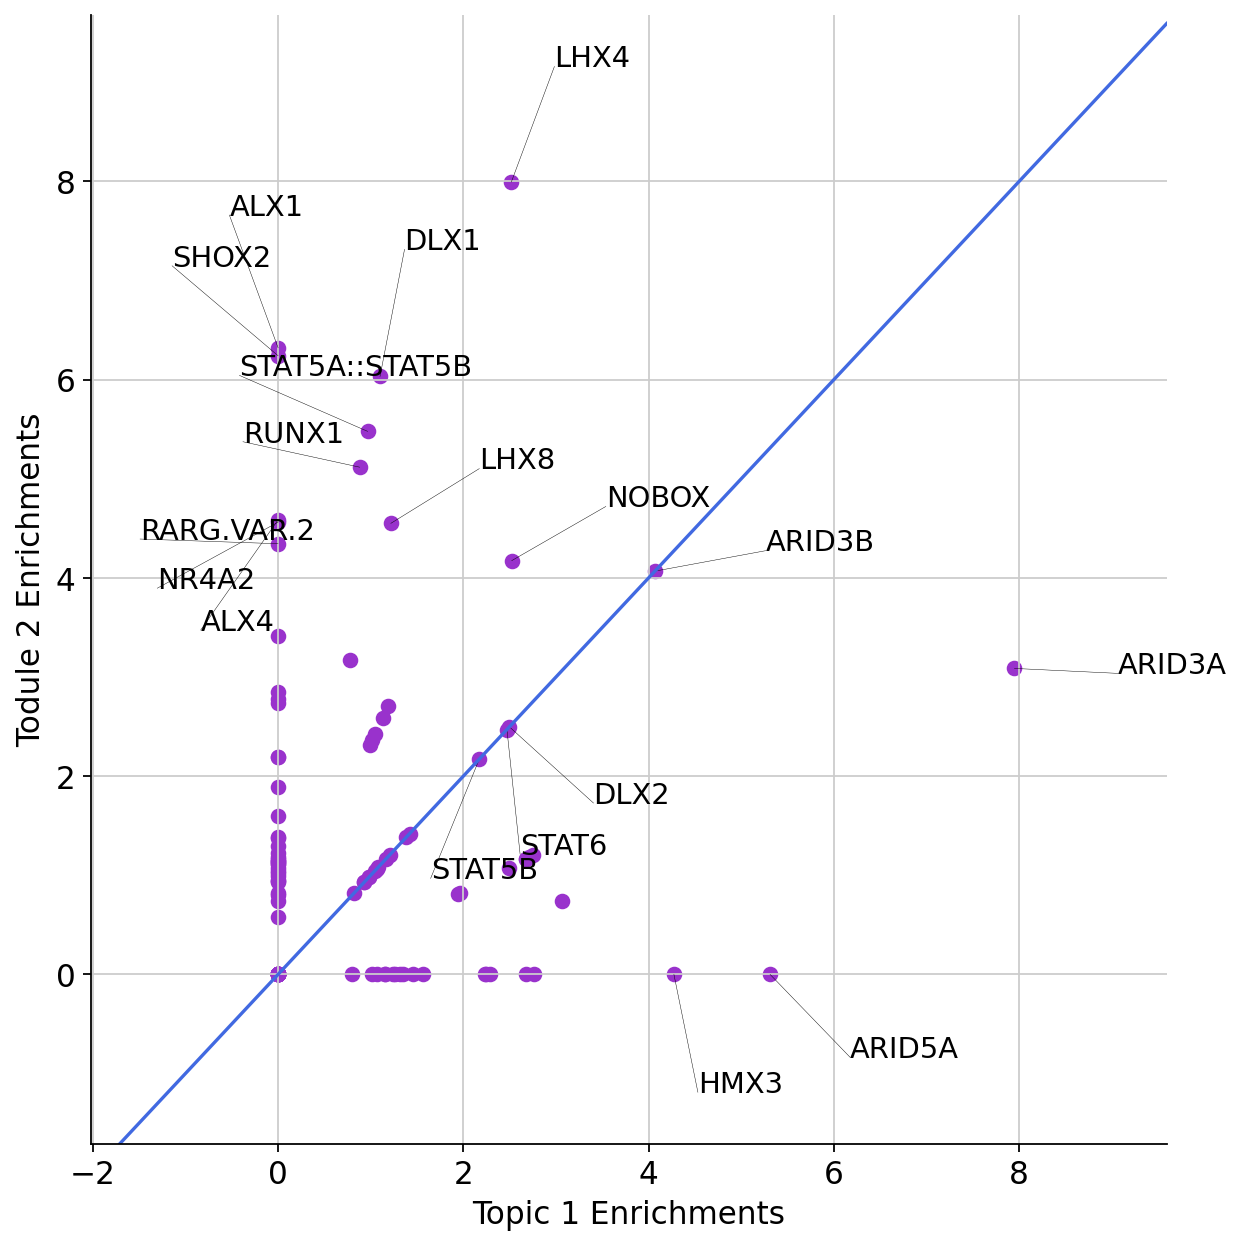

In [217]:
compare_latent_TFs(1,2, "figs/Hair/20_aligned/TF_1_2.png",pval_threshold=(1e-4, 1e-4))

In [223]:

for i in range(20):
    for j in range(20):
        if i !=j:
            filename = "figs/Hair/20_aligned/TF_{}_{}.png".format(str(i), str(j)) 
            compare_latent_TFs(i,j, filename, pval_threshold=(1e-5, 1e-5))
            plt.close()

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:02<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

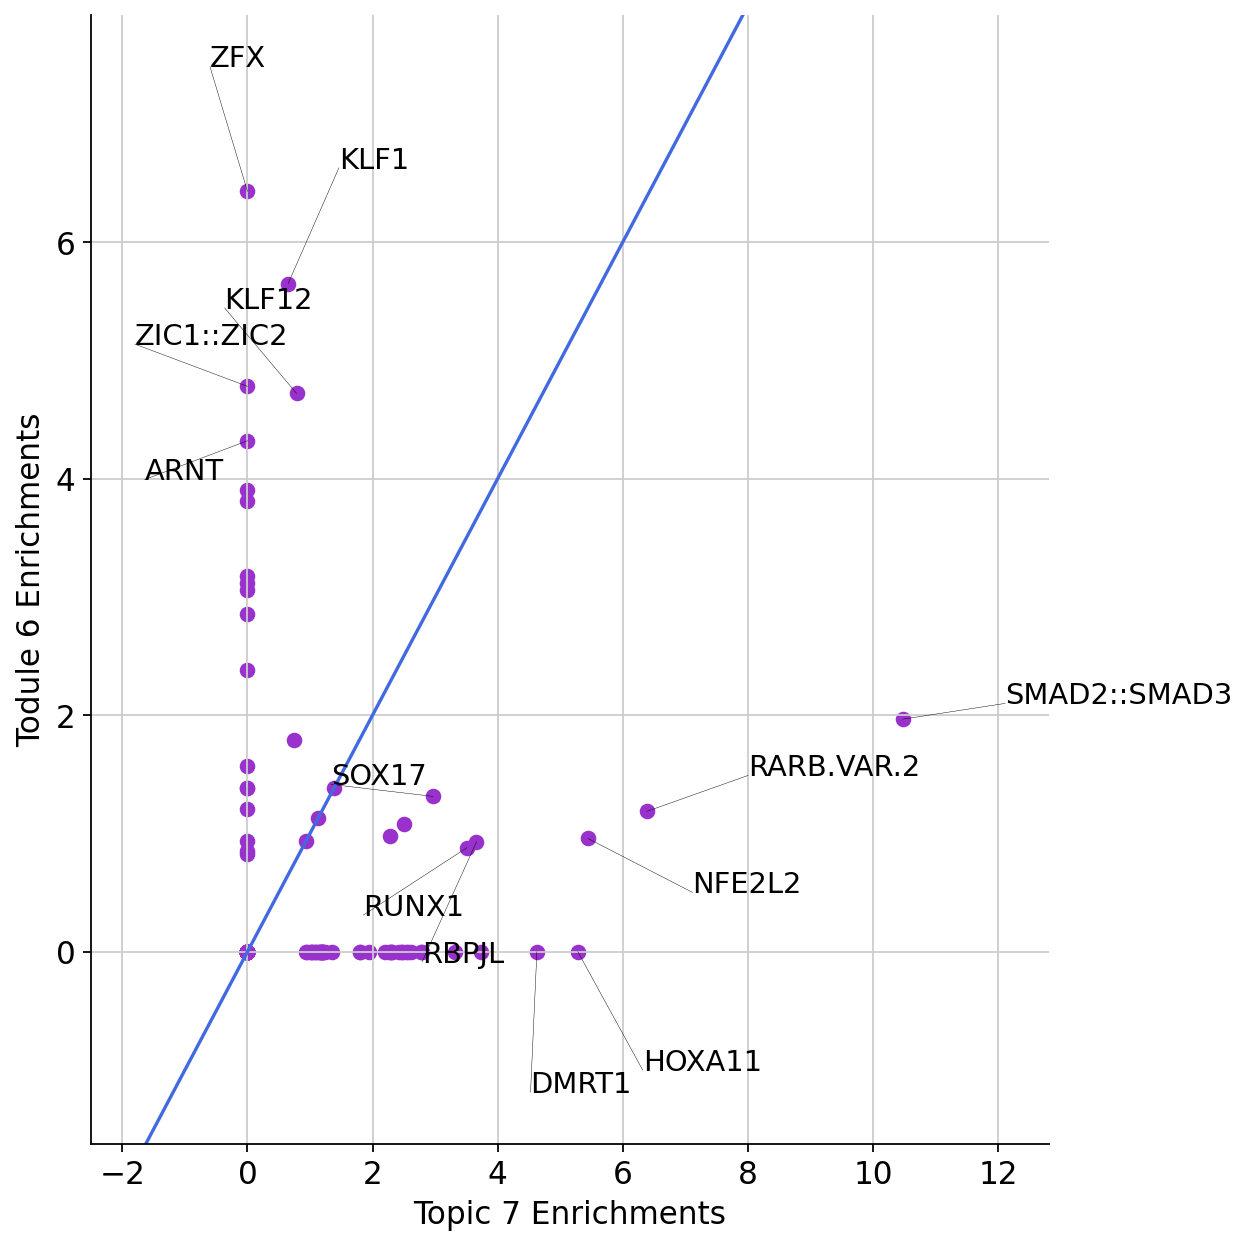

In [210]:
compare_latent_TFs(7,6, "figs/Hair/20_aligned/TF_7_6.png",pval_threshold=(1e-4, 1e-4))

In [198]:
#    def plot_compare_group_enrichments(self, couple_index, decouple_index, factor_type = 'motifs', 
#         label_factors = None, hue = None, palette = 'coolwarm', hue_order = None, 
#         ax = None, figsize = (8,8), legend_label = '', show_legend = True, fontsize = 13, 
#         pval_threshold = (1e-50, 1e-50), na_color = 'lightgrey',
#         color = 'grey', label_closeness = 3, max_label_repeats = 3, show_factor_ids = False):
## def get_enriched_grouped_TFs(self, factor_type = 'motifs', top_quantile = 0.2, *, 
#            group_index,  hits_matrix, metadata, loadings, num_exo_features, group_type="decouple"):

# def compare_couple_decouple_latent_TFs(pval_threshold=[1e-5, 1e-5],save_path=None):
#     latent_l1_tf, index_learnt = model.get_enriched_grouped_TFs(atac_data, group_index=range(10, 20), top_quantile=5e-6, loadings=loadings, num_exo_features=1e6,group_type="coupled")
#     latent_l2_tf, index_learnt = model.get_enriched_grouped_TFs(atac_data, group_index=range(10), top_quantile=5e-6, loadings=loadings, num_exo_features=1e6, group_type="decoupled")
#     model.plot_compare_group_enrichments(factor_type = 'motifs', color = 'crimson', pval_threshold=pval_threshold)
#     if save_path!= None:
#         plt.savefig(save_path, dpi=300)



def compare_couple_decouple_latent_TFs(atac_data,  loadings, pval_threshold=[1e-5, 1e-5],save_path=None):
    latent_l1_tf, index_learnt = model.get_enriched_grouped_TFs(atac_data, group_index=range(10, 20), top_quantile=2e-5, loadings=loadings, num_exo_features=1e6,group_type="decoupled")
    latent_l2_tf, index_learnt = model.get_enriched_grouped_TFs(atac_data, group_index=range(10), top_quantile=2e-5, loadings=loadings, num_exo_features=1e6, group_type="coupled")
    model.plot_compare_group_enrichments(factor_type = 'motifs', color = 'crimson', pval_threshold=pval_threshold)
    if save_path!= None:
        plt.savefig(save_path, dpi=300)
# model.plot_compare_group_enrichments(couple_index=range(10, 20), decouple_index=range(10), factor_type = 'motifs', color = 'pink')


Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

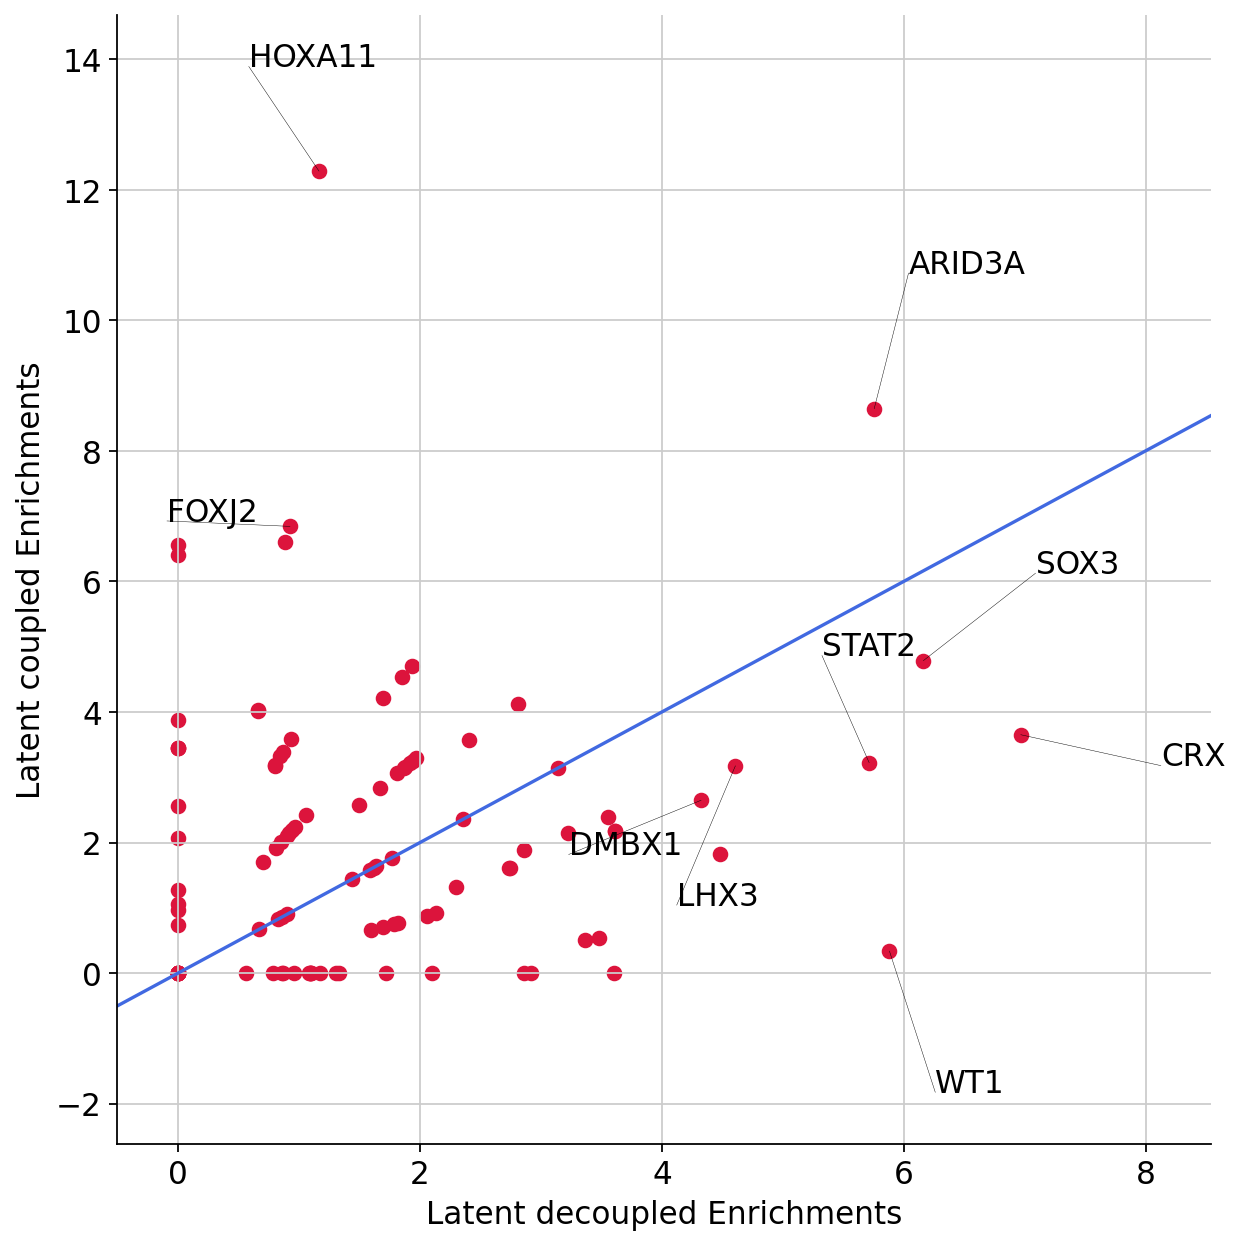

In [200]:
compare_couple_decouple_latent_TFs(atac_data,  loadings, pval_threshold = (1e-6, 1e-8), save_path="figs/Hair/20_aligned/TF_quant2_labeled.png")

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

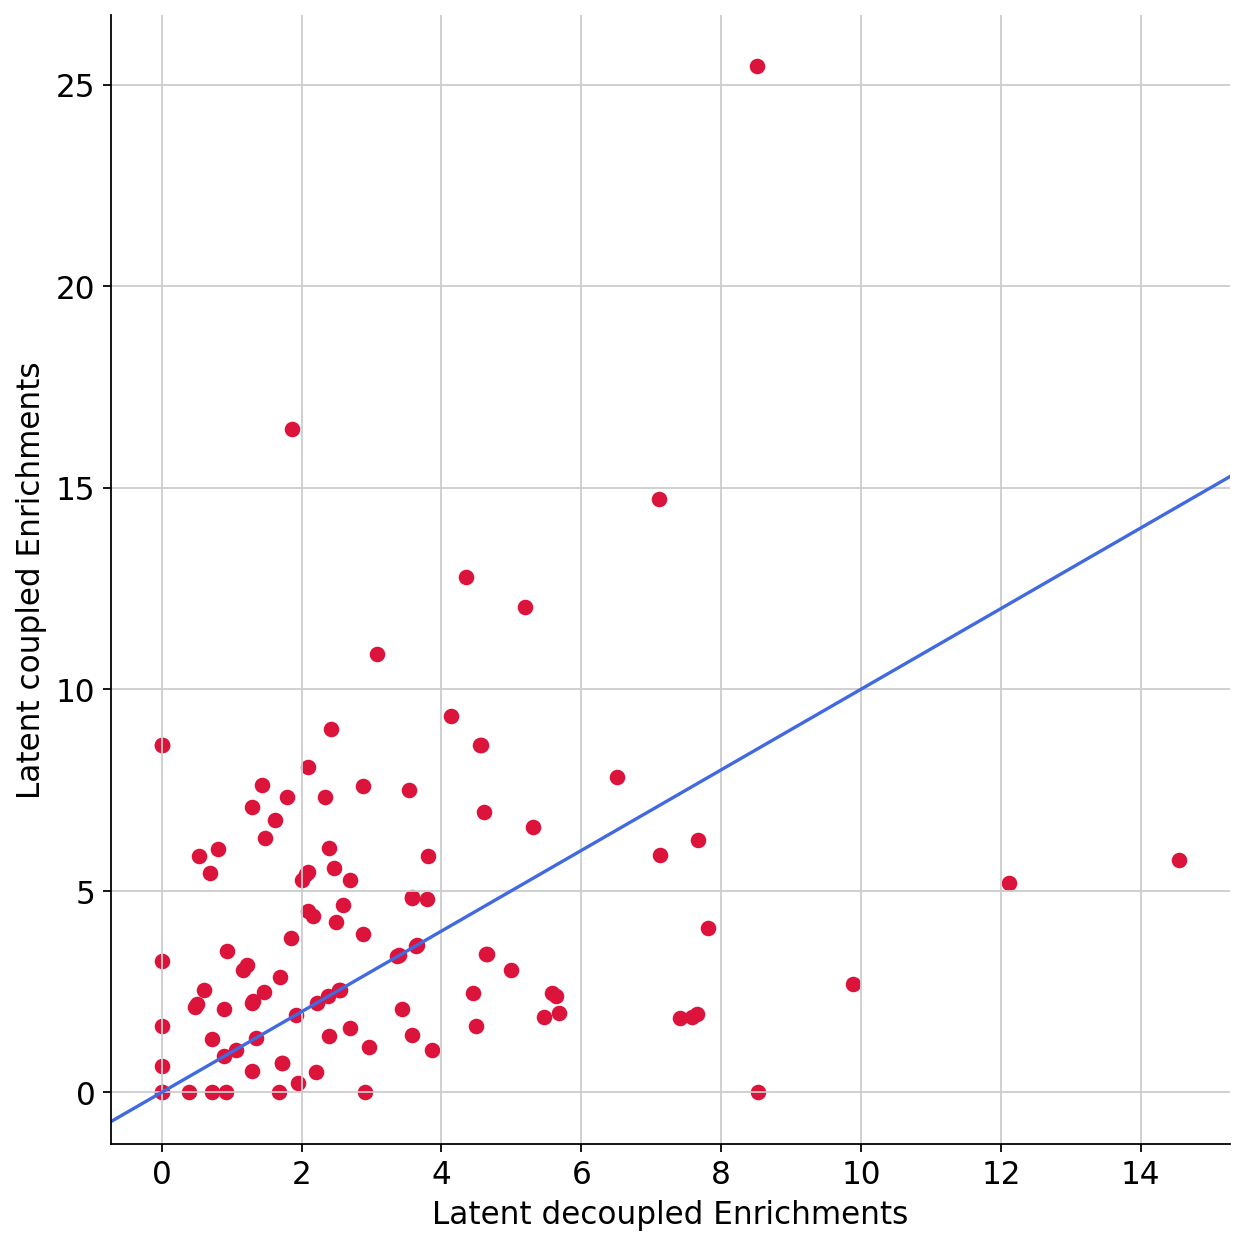

In [195]:
compare_couple_decouple_latent_TFs(atac_data,  loadings, pval_threshold = (1e-89, 1e-29), save_path="figs/Hair/20_aligned/TF_quant2_unlabeled.png")

In [189]:
latent_l1_tf, index_learnt = model.get_enriched_grouped_TFs(atac_data, group_index=range(10, 20), top_quantile=1e-4, loadings=loadings, num_exo_features=1e6,group_type="decoupled")
latent_l1_tf

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

[{'id': 'MA0483.1',
  'name': 'GFI1B',
  'parsed_name': 'GFI1B',
  'pval': 1.598018170189867e-05,
  'test_statistic': 7.839007570052713},
 {'id': 'MA0885.1',
  'name': 'DLX2',
  'parsed_name': 'DLX2',
  'pval': 2.4302646579875087e-07,
  'test_statistic': 11.401413913450197},
 {'id': 'MA0677.1',
  'name': 'NR2F6',
  'parsed_name': 'NR2F6',
  'pval': 2.4688756515061785e-08,
  'test_statistic': 12.45249852362823},
 {'id': 'MA0117.2',
  'name': 'MAFB',
  'parsed_name': 'MAFB',
  'pval': 0.0008352688109871648,
  'test_statistic': 7.242394175068945},
 {'id': 'MA0858.1',
  'name': 'RARB.VAR.2',
  'parsed_name': 'RARB.VAR.2',
  'pval': 4.3644067560821685e-07,
  'test_statistic': 12.901962821995038},
 {'id': 'MA0883.1',
  'name': 'DMBX1',
  'parsed_name': 'DMBX1',
  'pval': 7.991844236656844e-08,
  'test_statistic': 21.35448355255101},
 {'id': 'MA0611.1',
  'name': 'DUX',
  'parsed_name': 'DUX',
  'pval': 1.1788607851707466e-07,
  'test_statistic': 15.381434527354719},
 {'id': 'MA0494.1',
  'na

In [14]:
model.enrichments.keys()

dict_keys([('motifs', 0), ('motifs', 18), ('motifs', 'coupled'), ('motifs', 'decoupled')])

In [8]:
# loadings = loadings.T
latent_8_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=8, top_quantile=5e-5, loadings=loadings, num_exo_features=1e6)
latent_8_tf = pd.DataFrame(latent_8_tf)


Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

In [9]:
latent_8_tf.sort_values(by=['pval']).head(20)


id          name parsed_name          pval  test_statistic
72   MA1607.1         FOXL2       FOXL2  7.250741e-17       38.300738
1    MA0885.1          DLX2        DLX2  3.725765e-16       40.525180
101  MA0151.1        ARID3A      ARID3A  1.278424e-15       23.502345
38   MA0135.1          LHX3        LHX3  5.796218e-13       32.218200
19   MA0704.1          LHX4        LHX4  1.313127e-11       29.552992
33   MA0029.1         MECOM       MECOM  3.612434e-11       34.050780
3    MA0117.2          MAFB        MAFB  1.016851e-10       30.224485
83   MA0840.1         CREB5       CREB5  2.260965e-10       36.678797
66   MA0879.1          DLX1        DLX1  3.228980e-10       26.441634
58   MA0601.1        ARID3B      ARID3B  7.485638e-10       23.978616
100  MA0851.1         FOXJ3       FOXJ3  2.951942e-09       20.421942
0    MA0483.1         GFI1B       GFI1B  3.853772e-09       19.791539
63   MA0503.1  NKX2-5.VAR.2        NKX2  3.900030e-08       18.729427
65   MA0896.1          HMX1        HMX1  6.363342e-08       23.081898
30   MA0720.1         SHOX2       SHOX2  8.352616e-08       22.160654
32   MA0065.2   PPARG::RXRA       PPARG  1.107434e-07       13.258396
29   MA0480.1         FOXO1       FOXO1  1.823108e-07       15.245675
2    MA0677.1         NR2F6       NR2F6  3.043567e-07       18.239036
84   MA0874.1           ARX         ARX  4.389465e-07       23.806888
21   MA0853.1          ALX4        ALX4  6.343629e-07       22.327692

In [10]:
latent_3_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=3, top_quantile=5e-5, loadings=loadings, num_exo_features=1e6)
latent_3_tf = pd.DataFrame(latent_3_tf)

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

In [11]:
latent_3_tf.sort_values(by=['pval']).head(20)


id          name parsed_name          pval  test_statistic
102  MA1622.1  SMAD2::SMAD3       SMAD2  5.462963e-39       84.096196
101  MA0151.1        ARID3A      ARID3A  2.929968e-14       21.402809
58   MA0601.1        ARID3B      ARID3B  2.797394e-11       27.312018
20   MA1625.1        STAT5B      STAT5B  3.130913e-11       22.036314
87   MA0832.1         TCF21       TCF21  4.958615e-10       25.156351
38   MA0135.1          LHX3        LHX3  5.109780e-10       25.068647
50   MA0869.1         SOX11       SOX11  1.720053e-09       28.207715
72   MA1607.1         FOXL2       FOXL2  1.824249e-09       21.608374
60   MA0897.1          HMX2        HMX2  3.009230e-09       26.226537
86   MA0898.1          HMX3        HMX3  5.160258e-09       24.443081
15   MA0591.1   BACH1::MAFK       BACH1  7.098685e-09       18.415450
45   MA0505.1         NR5A2       NR5A2  1.010723e-08       17.661004
2    MA0677.1         NR2F6       NR2F6  1.450629e-08       21.343347
24   MA0911.1        HOXA11      HOXA11  2.734479e-08       38.426085
79   MA0002.2         RUNX1       RUNX1  3.175479e-08       15.410025
10   MA0880.1          DLX3        DLX3  6.302419e-08       23.115138
98   MA0881.1          DLX4        DLX4  6.302419e-08       23.115138
57   MA0150.2        NFE2L2      NFE2L2  1.143822e-07       16.229064
42   MA0514.1          SOX3        SOX3  1.365462e-07       12.925848
59   MA0518.1         STAT4       STAT4  1.763842e-07       15.313526

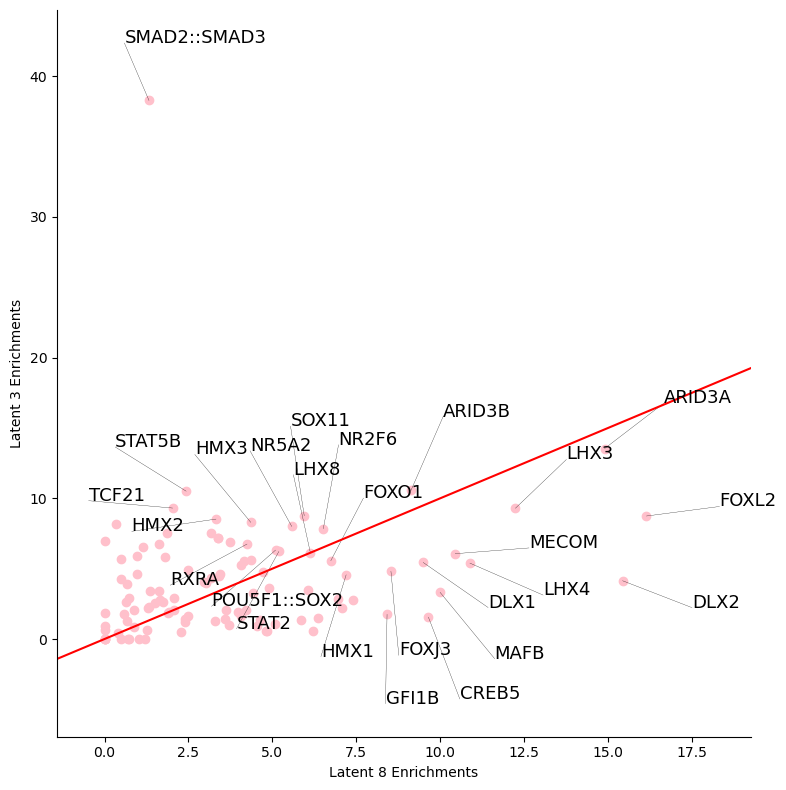

In [23]:
import matplotlib.pyplot as plt
model.plot_compare_topic_enrichments(8, 3, pval_threshold=(1e-10, 1e-11), color="pink")
plt.savefig("figs/Hair/TF_8_3.pdf", dpi=300)

In [16]:
latent_6_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=6, top_quantile=1e-5, loadings=loadings, num_exo_features=1e7)
latent_6_tf = pd.DataFrame(latent_6_tf)

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

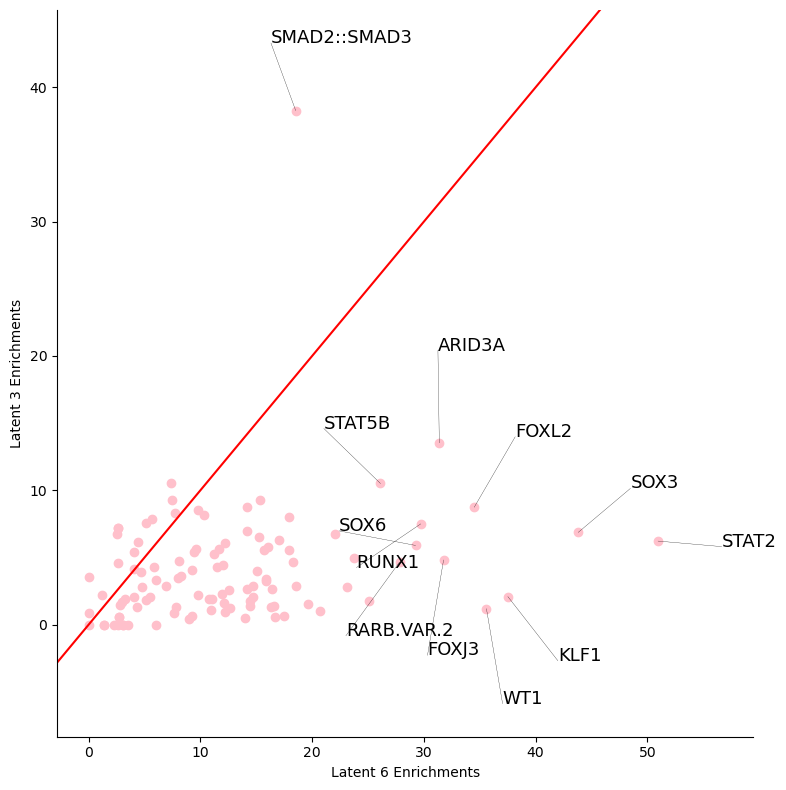

In [24]:
model.plot_compare_topic_enrichments(6, 3, pval_threshold=(1e-30, 1e-30), color="pink")
plt.savefig("figs/Hair/TF_6_3.pdf", dpi=300)

In [23]:
latent_6_tf.sort_values(by=['pval']).head(10)


id        name parsed_name          pval  test_statistic
78   MA1623.1       STAT2       STAT2  1.109757e-51      194.550707
42   MA0514.1        SOX3        SOX3  1.553712e-44      188.970499
71   MA0493.1        KLF1        KLF1  3.075088e-38      118.999290
34   MA1627.1         WT1         WT1  2.536222e-36       97.996123
72   MA1607.1       FOXL2       FOXL2  3.138889e-35      218.263617
100  MA0851.1       FOXJ3       FOXJ3  1.742546e-32      192.546196
101  MA0151.1      ARID3A      ARID3A  4.207979e-32      119.283192
79   MA0002.2       RUNX1       RUNX1  1.918217e-30      145.717971
53   MA0515.1        SOX6        SOX6  5.527529e-30      173.378219
4    MA0858.1  RARB.VAR.2  RARB.VAR.2  1.523844e-28      243.241919

In [18]:
latent_4_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=4, top_quantile=5e-5, loadings=loadings, num_exo_features=1e6)
latent_4_tf = pd.DataFrame(latent_4_tf)

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

In [19]:
latent_1_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=1, top_quantile=5e-5, loadings=loadings, num_exo_features=1e6)
latent_1_tf = pd.DataFrame(latent_1_tf)

Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

legend label 
axlabel ('Latent 1 Enrichments', 'Latent 8 Enrichments')


<AxesSubplot:xlabel='Latent 1 Enrichments', ylabel='Latent 8 Enrichments'>

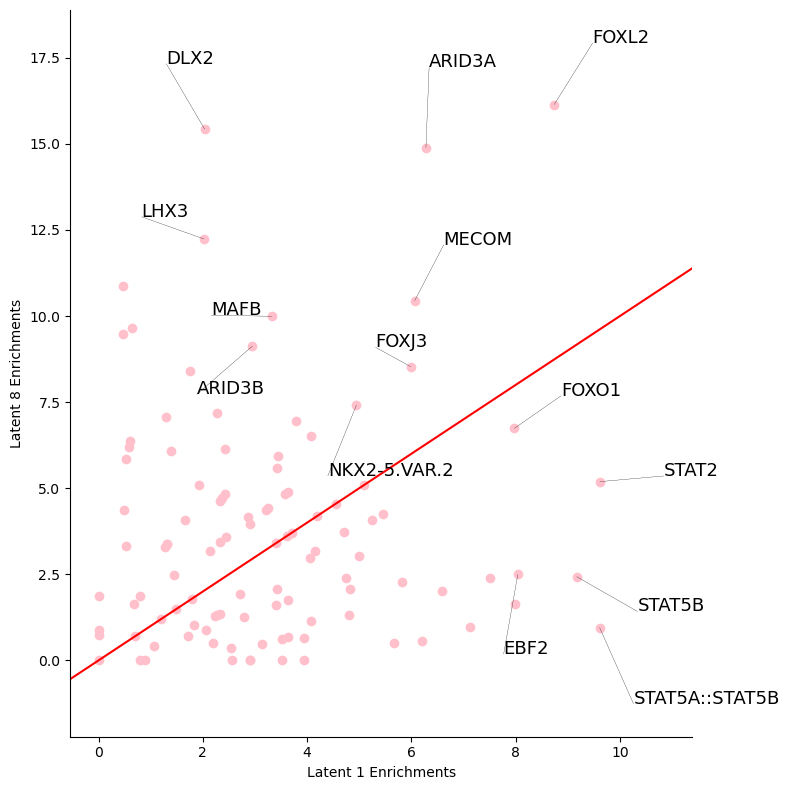

In [21]:
model.plot_compare_topic_enrichments(1, 8, color="pink", pval_threshold=(1e-10, 1e-12))

In [21]:
latent_2_tf, index_learnt = model.get_enriched_TFs(atac_data, topic_num=2, top_quantile=5e-5, loadings=loadings, num_exo_features=1e6)
latent_2_tf = pd.DataFrame(latent_2_tf)
latent_2_tf.sort_values(by=['pval']).head(10)


Finding enrichments:   0%|          | 0/107 [00:00<?, ?it/s]

id    name parsed_name          pval  test_statistic
101  MA0151.1  ARID3A      ARID3A  7.983093e-28       46.119926
78   MA1623.1   STAT2       STAT2  8.547902e-20       30.095213
66   MA0879.1    DLX1        DLX1  4.692142e-18       46.872833
19   MA0704.1    LHX4        LHX4  2.721620e-16       41.548921
30   MA0720.1   SHOX2       SHOX2  8.944317e-14       38.416793
79   MA0002.2   RUNX1       RUNX1  1.811611e-13       24.672422
53   MA0515.1    SOX6        SOX6  2.545124e-13       28.448438
38   MA0135.1    LHX3        LHX3  5.796218e-13       32.218200
58   MA0601.1  ARID3B      ARID3B  9.277540e-13       30.816987
42   MA0514.1    SOX3        SOX3  1.566996e-12       20.694161

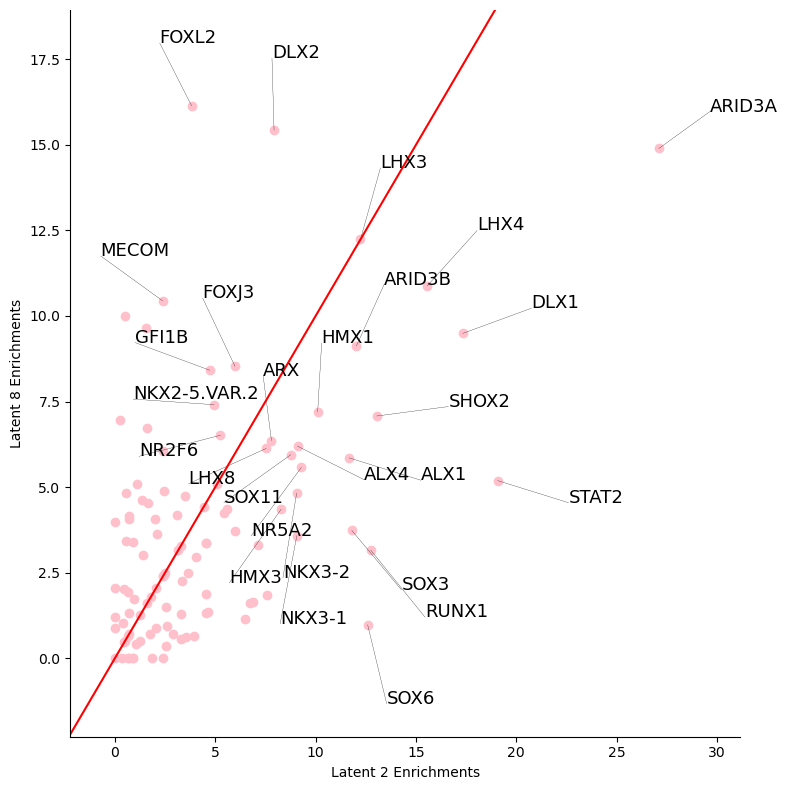

In [22]:
model.plot_compare_topic_enrichments(2, 8, color="pink", pval_threshold=(1e-10, 1e-12))
plt.savefig("figs/Hair/TF_8_2.pdf", dpi=300)

In [13]:
## plot the TF enrichment figures

atac_data =  sc.read_h5ad("data/datasets/mouse_hair_atac_interim.h5ad")
